# import data

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
import copy
import time
from collections import deque
from collections import defaultdict
from matplotlib.ticker import MaxNLocator
from collections import Counter
import csv
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from itertools import groupby
from itertools import combinations

In [39]:
hec='/content/HEC.STU.txt'

tre='/content/tre-s-92.stu'

ute='/content/ute-s-92.stu'

In [40]:
#path = '/content/car-f-92.stu'
#path = '/content/car-s-91.stu'
#path = '/content/ear-f-83.stu'
#path = '/content/kfu-s-93.stu'
#path = '/content/lse-f-91.stu'
#path = '/content/pur-s-93.stu'
#path = '/content/rye-s-93.stu'
#path = '/content/sta-f-83.stu'
#path = '/content/uta-s-92.stu'
#path = '/content/yor-f-83.stu'


In [41]:
student_enrollments = []


path = hec


with open(path, 'r') as file:
    for line in file:
        course_ids = list(map(int, line.strip().split()))
        student_enrollments.append(course_ids)




In [42]:
from collections import defaultdict

exam_counts = defaultdict(int)

for student in student_enrollments:
    for course_id in student:
        exam_counts[course_id] += 1

for exam_id in sorted(exam_counts):
    print(f"Exam {exam_id}: {exam_counts[exam_id]} students")


Exam 1: 367 students
Exam 2: 469 students
Exam 3: 245 students
Exam 4: 579 students
Exam 5: 207 students
Exam 6: 454 students
Exam 7: 102 students
Exam 8: 61 students
Exam 9: 32 students
Exam 10: 205 students
Exam 11: 573 students
Exam 12: 257 students
Exam 13: 634 students
Exam 14: 120 students
Exam 15: 59 students
Exam 16: 71 students
Exam 17: 275 students
Exam 18: 35 students
Exam 19: 289 students
Exam 20: 141 students
Exam 21: 187 students
Exam 22: 197 students
Exam 23: 273 students
Exam 24: 210 students
Exam 25: 169 students
Exam 26: 69 students
Exam 27: 272 students
Exam 28: 127 students
Exam 29: 48 students
Exam 30: 251 students
Exam 31: 114 students
Exam 32: 154 students
Exam 33: 129 students
Exam 34: 127 students
Exam 35: 30 students
Exam 36: 76 students
Exam 37: 66 students
Exam 38: 78 students
Exam 39: 59 students
Exam 40: 69 students
Exam 41: 54 students
Exam 42: 29 students
Exam 43: 44 students
Exam 44: 55 students
Exam 45: 65 students
Exam 46: 78 students
Exam 47: 24 stud

## Number of student per exam

Total number of enrollment: 10625
Total number of students: 2823


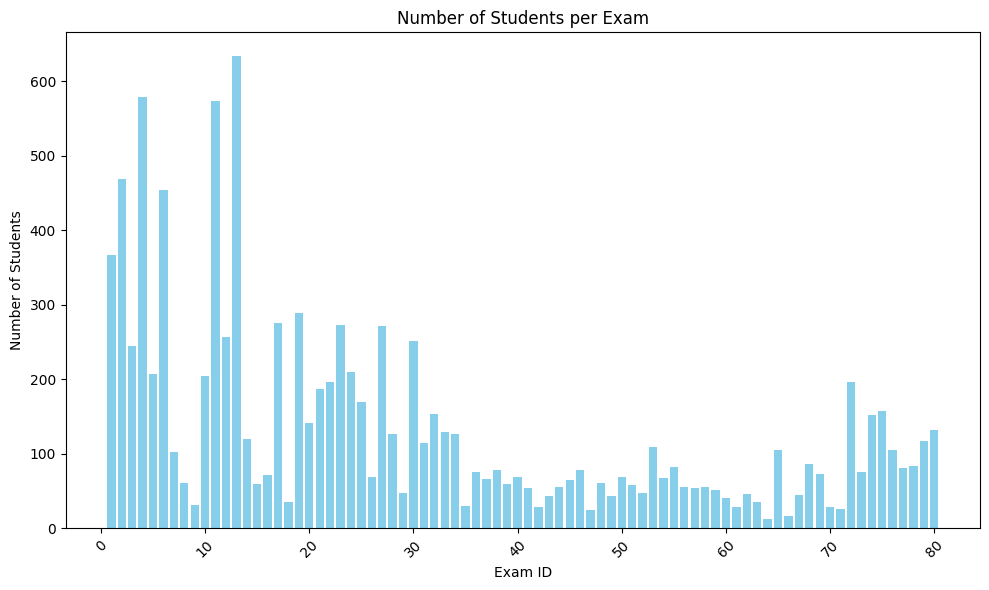

In [43]:
sorted_exam_ids = sorted(exam_counts)
student_counts = [exam_counts[exam_id] for exam_id in sorted_exam_ids]
print('Total number of enrollment:',sum(student_counts))
print('Total number of students:',len(student_enrollments))

plt.figure(figsize=(10, 6))
plt.bar(sorted_exam_ids, student_counts, color='skyblue')
plt.xlabel('Exam ID')
plt.ylabel('Number of Students')
plt.title('Number of Students per Exam')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Conflict matrix

In [44]:
all_exams = set()
for student in student_enrollments:
    all_exams.update(student)

num_exams = max(all_exams)
total_exams = num_exams
conflict_matrix = np.zeros((num_exams, num_exams), dtype=int)

for student in student_enrollments[:]:
    for i in student:
        #print(i)
        for j in student:
           # print('-',j)
            conflict_matrix[i-1][j-1] += 1

np.fill_diagonal(conflict_matrix, 0)

print("Exams found:", sorted(all_exams))
print("Exams number:", len(all_exams))
print("Conflict matrix:")
print(len(conflict_matrix[0]))
print(conflict_matrix)

Exams found: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
Exams number: 80
Conflict matrix:
80
[[  0  19  23 ...   0   0   0]
 [ 19   0 174 ...   1   0   0]
 [ 23 174   0 ...   0   0   0]
 ...
 [  0   1   0 ...   0  16   7]
 [  0   0   0 ...  16   0  23]
 [  0   0   0 ...   7  23   0]]


In [45]:
#num_exams = 50
conflict_matrix = [row[:num_exams] for row in conflict_matrix[:num_exams]]

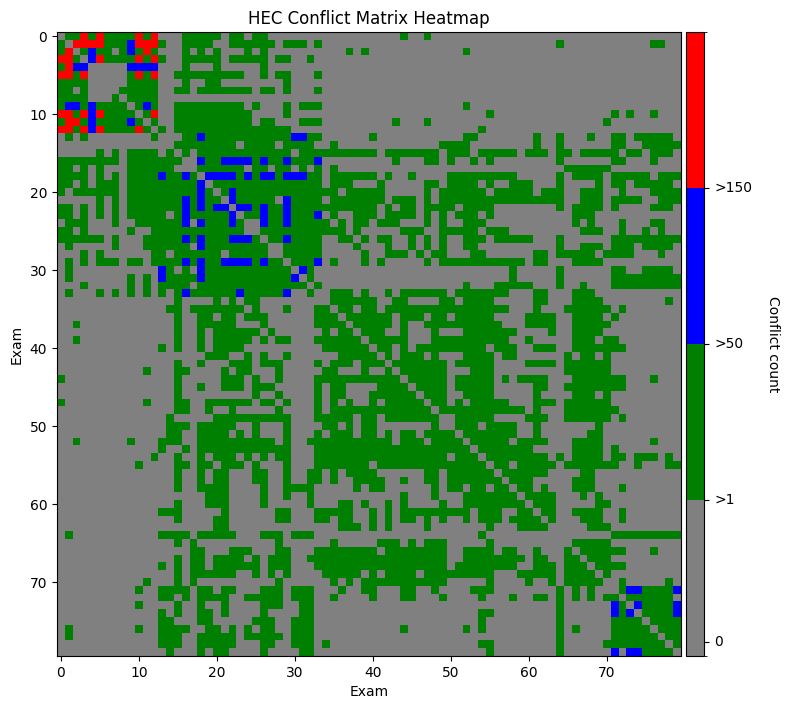

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

conflict_matrix = np.array(conflict_matrix)

cmap_colors = ['grey', 'green', 'blue', 'red']
cmap = mcolors.ListedColormap(cmap_colors)
bounds = [-0.1, 1, 50, 150, np.max(conflict_matrix) + 1]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(conflict_matrix, cmap=cmap, norm=norm)

# Create colorbar with smaller width
from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)  # 3% width, small padding

cbar = plt.colorbar(im, cax=cax, ticks=[0, 1, 50, 150])

# Center tick labels (default alignment is centered, but let's ensure)
cbar.ax.set_yticklabels(['0', '>1', '>50', '>150'], va='center')

cbar.set_label('Conflict count', labelpad=10, rotation=270, va='bottom', fontsize=10)

ax.set_title("HEC Conflict Matrix Heatmap")
ax.set_xlabel("Exam")
ax.set_ylabel("Exam")

plt.tight_layout()
plt.show()

In [47]:
'''
for row in conflict_matrix:
    row_str = []
    for val in row:
        if val == 0:
            color_code = '\033[90m'   # grey
        elif 1 <= val <= 50:
            color_code = '\033[92m'   # green
        elif 50 <= val <= 150:
            color_code = '\033[94m'   # yellow
        else:
            color_code = '\033[91m'   # red

        row_str.append(f"{color_code}{val}\033[0m")
    print(' '.join(row_str))
'''

'\nfor row in conflict_matrix:\n    row_str = []\n    for val in row:\n        if val == 0:\n            color_code = \'\x1b\'   # grey\n        elif 1 <= val <= 50:\n            color_code = \'\x1b\'   # green\n        elif 50 <= val <= 150:\n            color_code = \'\x1b\'   # yellow\n        else:\n            color_code = \'\x1b\'   # red\n\n        row_str.append(f"{color_code}{val}\x1b")\n    print(\' \'.join(row_str))\n'

In [48]:
def calculate_conflict_matrix_density(conflict_matrix):
    n = len(conflict_matrix)  # number of exams
    non_zero_conflicts = 0
    total_possible_pairs = n * (n - 1) // 2

    for i in range(n):
        for j in range(i + 1, n):  # upper triangle only
            if conflict_matrix[i][j] > 0:
                non_zero_conflicts += 1

    density = non_zero_conflicts / total_possible_pairs if total_possible_pairs > 0 else 0
    return density


In [49]:
def total_conflicts(conflict_matrix):
    total = 0
    n = len(conflict_matrix)
    for i in range(n):
        for j in range(i + 1, n):
            total += conflict_matrix[i][j]

    return total

In [50]:
print(f"Conflict matrix density: {calculate_conflict_matrix_density(conflict_matrix):.4f}")

print(f"Total conflicts: {total_conflicts(conflict_matrix)}")

Conflict matrix density: 0.4275
Total conflicts: 17606


## Minimize the timeslots (initial timetable)


In [51]:
import networkx as nx

G = nx.Graph()

# Add nodes
for exam in range(1, num_exams + 1):
    G.add_node(exam)

# Add edges where conflicts exist
for i in range(num_exams):
    for j in range(i + 1, num_exams):
        if conflict_matrix[i][j] > 0:
            G.add_edge(i + 1, j + 1)  # Exams are 1-indexed

print(G)

Graph with 80 nodes and 1351 edges


In [52]:
def largest_enrollment_first(G, colors):
    return sorted(G.nodes(), key=lambda x: -exam_counts.get(x, 0))
# number of exam students

In [53]:
def largest_weighted_degree_first(G, colors):
    weighted_degree = {
        node: sum(conflict_matrix[node - 1])  # node is 1-indexed
        for node in G.nodes()
    }
    return sorted(G.nodes(), key=lambda x: -weighted_degree[x])
# Exams with the most severe total conflicts

In [54]:
strategies = ['largest_first','saturation_largest_first',largest_weighted_degree_first,largest_enrollment_first,'random_sequential']
# from Algorithmic Strategies and Applications
# 1 largest conflict first   ~first fail principle
# 2 exam with the fewest option
# 3 exam with the most total conflicts
# 4 exam with the most students
# 5 randomly

timeslot_results = {}
least_timeslots = float('inf')
best_strategy = None

for strat in strategies:
    coloring = nx.coloring.greedy_color(G, strategy=strat)
    num_timeslots = max(coloring.values()) + 1
    timeslot_results[strat] = num_timeslots

    print(f"Strategy: {strat}, Timeslots used: {num_timeslots}")

    if num_timeslots < least_timeslots:
        least_timeslots = num_timeslots
        best_strategy = strat

print(f"\nBest strategy: {best_strategy} with {least_timeslots} timeslots.")
coloring = nx.coloring.greedy_color(G, strategy=best_strategy)


Strategy: largest_first, Timeslots used: 20
Strategy: saturation_largest_first, Timeslots used: 19
Strategy: <function largest_weighted_degree_first at 0x7c62eeab19e0>, Timeslots used: 20
Strategy: <function largest_enrollment_first at 0x7c62eeab22a0>, Timeslots used: 22
Strategy: random_sequential, Timeslots used: 23

Best strategy: saturation_largest_first with 19 timeslots.


## Expected timeslots

In [64]:
expected_timeslots = 20
max_timeslots = expected_timeslots
print(f"Expected timeslots: {expected_timeslots}")

Expected timeslots: 20


## Print timetable

In [56]:
def print_timetable(timetable):
    print("Exam Timetable:")
    print("=" * 30)
    for timeslot in sorted(timetable.keys()):
        exams = sorted(timetable[timeslot])
        print(f"Timeslot {timeslot+1}: Exams {exams}")


##Initial timetable

In [57]:
from collections import defaultdict

timetable = defaultdict(list)
for exam, timeslot in coloring.items():
    timetable[timeslot].append(exam)

timetableSD = copy.deepcopy(timetable)

print_timetable(timetableSD)


Exam Timetable:
Timeslot 1: Exams [2, 22, 29, 35, 76]
Timeslot 2: Exams [9, 21, 43, 72]
Timeslot 3: Exams [1, 14, 16, 42, 50, 60, 80]
Timeslot 4: Exams [5, 7, 19, 48, 61, 77]
Timeslot 5: Exams [3, 23, 47, 52, 64, 66, 73]
Timeslot 6: Exams [10, 27, 41, 56]
Timeslot 7: Exams [20, 69, 74]
Timeslot 8: Exams [12, 30, 45, 65]
Timeslot 9: Exams [17, 18, 53, 59, 78]
Timeslot 10: Exams [15, 24, 55, 71]
Timeslot 11: Exams [6, 25, 26, 49, 63, 79]
Timeslot 12: Exams [13, 32, 34, 39, 44, 51]
Timeslot 13: Exams [4, 28, 36, 75]
Timeslot 14: Exams [8, 33, 54, 62]
Timeslot 15: Exams [11, 31, 68]
Timeslot 16: Exams [40, 70]
Timeslot 17: Exams [37, 57]
Timeslot 18: Exams [67]
Timeslot 19: Exams [38, 46, 58]


## Check valid

In [58]:
def check_timetable_conflicts(timetable, conflict_matrix):
    """
    Checks for hard conflicts in each timeslot.
    Prints details of conflicting exams or confirms no conflict.

    Parameters:
    - timetable: dict of {timeslot: list of exams}
    - conflict_matrix: 2D list or array [i][j] → number of students shared between exam i+1 and j+1
    """
    print("Checking for exam conflicts...\n" + "=" * 35)

    for timeslot in sorted(timetable.keys()):
        exams_in_slot = timetable[timeslot]
        clash_found = False

        for idx_i, i in enumerate(exams_in_slot):
            for j in exams_in_slot[idx_i + 1:]:
                if conflict_matrix[i - 1][j - 1] > 0:
                    clash_found = True
                    print(f"Conflict in Timeslot {timeslot+1}: Exams {i} & {j} have {conflict_matrix[i - 1][j - 1]} students in common")

        if not clash_found:
            print(f"Timeslot {timeslot+1}: ✅ No conflicts")

check_timetable_conflicts(timetableSD, conflict_matrix)


Checking for exam conflicts...
Timeslot 1: ✅ No conflicts
Timeslot 2: ✅ No conflicts
Timeslot 3: ✅ No conflicts
Timeslot 4: ✅ No conflicts
Timeslot 5: ✅ No conflicts
Timeslot 6: ✅ No conflicts
Timeslot 7: ✅ No conflicts
Timeslot 8: ✅ No conflicts
Timeslot 9: ✅ No conflicts
Timeslot 10: ✅ No conflicts
Timeslot 11: ✅ No conflicts
Timeslot 12: ✅ No conflicts
Timeslot 13: ✅ No conflicts
Timeslot 14: ✅ No conflicts
Timeslot 15: ✅ No conflicts
Timeslot 16: ✅ No conflicts
Timeslot 17: ✅ No conflicts
Timeslot 18: ✅ No conflicts
Timeslot 19: ✅ No conflicts


##Count timetable

In [59]:
def count_total_items(schedule):
    return print('Exam numbers:',sum(len(exams) for exams in schedule.values()))

count_total_items(timetableSD)


def check_missing_exams(timetable, total_exams):
    placed = set(exam for exams in timetable.values() for exam in exams)
    missing = set(range(1, total_exams + 1)) - placed
    if missing:
        print(f"⚠️ Missing exams: {sorted(missing)}")
    else:
        print("✅ All exams are scheduled.")

check_missing_exams(timetableSD,num_exams)

Exam numbers: 80
✅ All exams are scheduled.


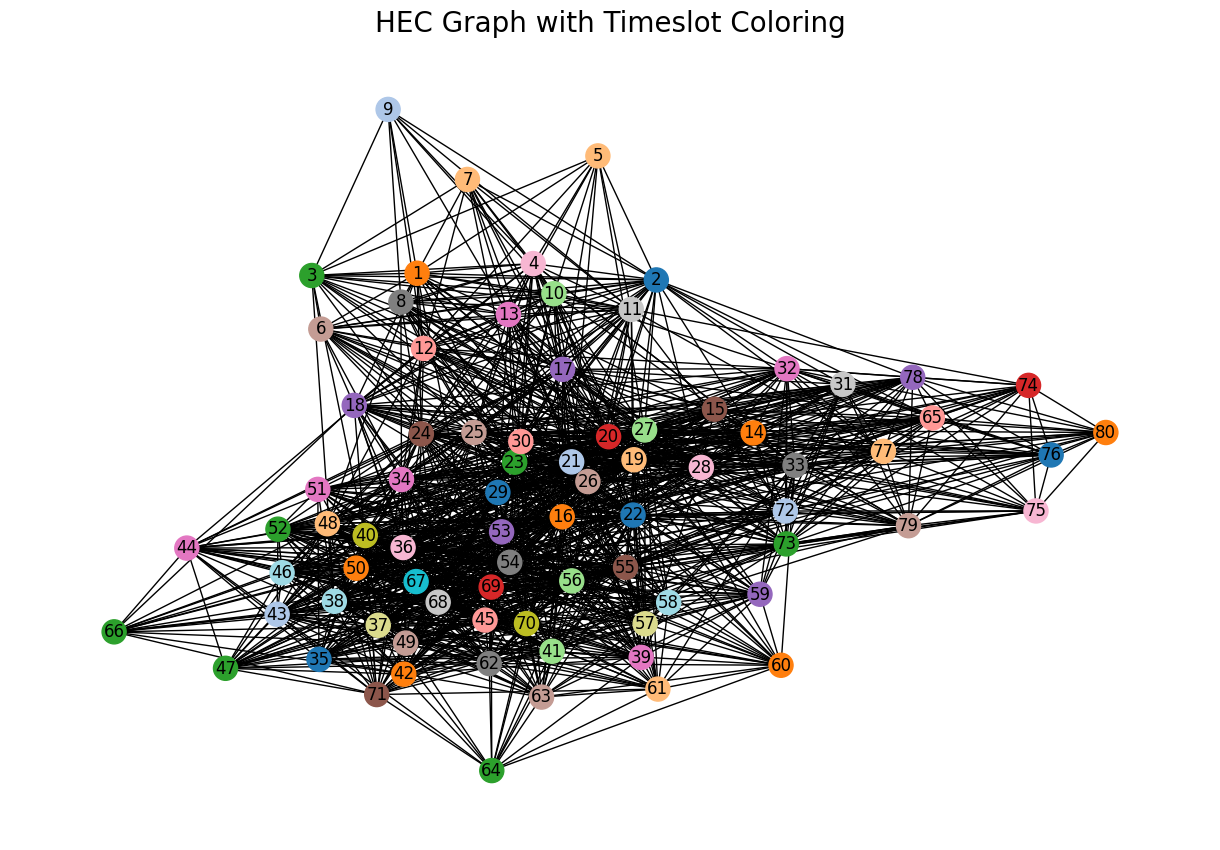

In [60]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
node_colors = [coloring[node] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.tab20)
plt.title("HEC Graph with Timeslot Coloring", fontsize=20)
plt.show()

## Cost function

In [61]:
def calculate_proximity_cost(timetable, conflict_matrix):
    # Step 1: Map each exam to its assigned timeslot
    exam_timeslot = {}
    for timeslot, exams in timetable.items():
        for exam in exams:
            exam_timeslot[exam] = timeslot
    #print(exam_timeslot)

    # Step 2: Compute total penalty
    total_penalty = 0
    for i in range(len(conflict_matrix)):
        for j in range(i + 1, len(conflict_matrix)):
            exam_i = i + 1
            exam_j = j + 1
            students = conflict_matrix[i][j]

            if students > 0:
                t_i = exam_timeslot.get(exam_i)   #timeslot for exam i
                t_j = exam_timeslot.get(exam_j)   #timeslot for exam j

                if t_i is not None and t_j is not None:
                    dist = abs(t_i - t_j)
                    if dist == 1:
                        weight = 16
                    elif dist == 2:
                        weight = 8
                    elif dist == 3:
                        weight = 4
                    elif dist == 4:
                        weight = 2
                    elif dist == 5:
                        weight = 1
                    elif dist == 0:
                        weight = 100000
                    else:
                        weight = 0

                    total_penalty += students * weight

    return total_penalty/len(student_enrollments)


In [62]:
penalty = calculate_proximity_cost(timetableSD, conflict_matrix)
print("Total proximity penalty:", penalty)


Total proximity penalty: 27.852639036486007


## Solution timetable

In [63]:
'''
hec='/content/EdHEC92.sol'

tre='/content/tre92.sol'

ute='/content/TorontoE92.sol'

path = hec


timetableSOL = defaultdict(list)
with open(path, 'r') as file:
    for line in file:
        if not line.strip():
            continue
        exam, timeslot = map(int, line.strip().split())
        timetableSOL[timeslot].append(exam)

penalty = calculate_proximity_cost(timetableSOL, conflict_matrix)
print("Total proximity penalty:", penalty)

print_timetable(timetableSOL)
check_timetable_conflicts(timetableSOL, conflict_matrix)
'''

'\nhec=\'/content/EdHEC92.sol\'\n\ntre=\'/content/tre92.sol\'\n\nute=\'/content/TorontoE92.sol\'\n\npath = hec\n\n\ntimetableSOL = defaultdict(list)\nwith open(path, \'r\') as file:\n    for line in file:\n        if not line.strip():\n            continue\n        exam, timeslot = map(int, line.strip().split())\n        timetableSOL[timeslot].append(exam)\n\npenalty = calculate_proximity_cost(timetableSOL, conflict_matrix)\nprint("Total proximity penalty:", penalty)\n\nprint_timetable(timetableSOL)\ncheck_timetable_conflicts(timetableSOL, conflict_matrix)\n'

# Helper function

In [65]:
def is_feasible(exam, target_timeslot, timetable, conflict_matrix):
    for other_exam in timetable[target_timeslot]:
        if conflict_matrix[exam - 1][other_exam - 1] > 0:
            return False
    return True

## Neighbour

In [66]:
def move_exam_randomly(timetable, max_timeslots, conflict_matrix):
    new_timetable = copy.deepcopy(timetable)
    timeslots = list(new_timetable.keys())

    for _ in range(100):  # max attempts
        non_empty_slots = [ts for ts in timeslots if new_timetable[ts]]
        if not non_empty_slots:
            continue
        old_timeslot = random.choice(non_empty_slots)

        exam = random.choice(new_timetable[old_timeslot])
        new_timeslot = random.choice(timeslots)
        if new_timeslot != old_timeslot and is_feasible(exam, new_timeslot, new_timetable, conflict_matrix):
            new_timetable[old_timeslot].remove(exam)
            new_timetable[new_timeslot].append(exam)
            return new_timetable
    return timetable

In [67]:
def swap_two_exams_randomly(timetable, conflict_matrix):
    new_timetable = copy.deepcopy(timetable)
    timeslots = list(new_timetable.keys())
    non_empty_slots = [ts for ts in timeslots if new_timetable[ts]]

    for _ in range(100):
        t1, t2 = random.sample(non_empty_slots, 2)

        e1 = random.choice(new_timetable[t1])
        e2 = random.choice(new_timetable[t2])

        if is_feasible(e1, t2, new_timetable, conflict_matrix) and is_feasible(e2, t1, new_timetable, conflict_matrix):
            new_timetable[t1].remove(e1)
            new_timetable[t2].remove(e2)
            new_timetable[t1].append(e2)
            new_timetable[t2].append(e1)
            return new_timetable
    return timetable



In [68]:
def get_kempe_chain(exam, t1, t2, timetable, conflict_matrix):
    chain = set()
    visited = set()
    queue = deque([exam])

    while queue:
        current = queue.popleft()
        if current in visited:
            continue
        visited.add(current)

        current_ts = t1 if current in timetable[t1] else t2
        if current_ts not in [t1, t2]:
            continue

        chain.add(current)

        # Check all other exams in t1 and t2
        for other in timetable[t1] + timetable[t2]:
            if other not in visited and conflict_matrix[current - 1][other - 1] > 0:
                queue.append(other)

    return chain

def apply_kempe_chain(timetable, conflict_matrix, max_timeslots):
    new_timetable = copy.deepcopy(timetable)
    timeslots = list(new_timetable.keys())
    t1 = random.choice(timeslots)
    if not new_timetable[t1]:
        return new_timetable,None  # no exam to work with

    exam = random.choice(new_timetable[t1])
    t2 = random.choice([ts for ts in timeslots if ts != t1])

    # Get the Kempe Chain involving this exam between t1 and t2
    kempe_chain = get_kempe_chain(exam, t1, t2, new_timetable, conflict_matrix)



    # Attempt the swap
    for e in kempe_chain:
        if e in new_timetable[t1]:
            new_timetable[t1].remove(e)
            new_timetable[t2].append(e)
        elif e in new_timetable[t2]:
            new_timetable[t2].remove(e)
            new_timetable[t1].append(e)

    # Check feasibility
    for ts in [t1, t2]:
        exams = new_timetable[ts]
        for i in range(len(exams)):
            for j in range(i + 1, len(exams)):
                if conflict_matrix[exams[i] - 1][exams[j] - 1] > 0:
                    return timetable,None  # Revert if infeasible

    return new_timetable,len(kempe_chain)  # Successful swap


In [69]:
def ejection_chain(timetable, conflict_matrix, max_chain_length=10):
    def find_timeslot(exam, timetable):
        for ts, exams in timetable.items():
            if exam in exams:
                return ts
        return None

    new_timetable = copy.deepcopy(timetable)

    timeslots = list(new_timetable.keys())

    # Choose random starting point
    start_ts = random.choice(timeslots)
    if not new_timetable[start_ts]:
        return timetable, None  # nothing to move

    start_exam = random.choice(new_timetable[start_ts])
    target_ts = random.choice([ts for ts in timeslots if ts != start_ts])

    # Start building the ejection chain
    chain = [(start_exam, target_ts)]
    visited = set([start_exam])

    success = False

    for _ in range(max_chain_length):
        current_exam, desired_ts = chain[-1]

        # If we can place the current_exam into desired_ts safely, we stop building chain
        if is_feasible(current_exam, desired_ts, new_timetable, conflict_matrix):
            success = True
            break

        # Find first conflicting exam in the desired timeslot
        conflicting_exams = [
            e for e in new_timetable[desired_ts]
            if conflict_matrix[current_exam - 1][e - 1] > 0
        ]

        if not conflicting_exams:
            return timetable, None  # logically shouldn't happen, but guard anyway

        eject_exam = conflicting_exams[0]

        if eject_exam in visited:
            return timetable, None  # cycle detected

        visited.add(eject_exam)

        # Find a feasible new timeslot for the ejected exam
        found_ts = None
        for ts in timeslots:
            if ts != desired_ts and is_feasible(eject_exam, ts, new_timetable, conflict_matrix):
                found_ts = ts
                break

        if found_ts is None:
            return timetable, None  # no valid move for ejected exam, abort

        chain.append((eject_exam, found_ts))

    if not success:
        return timetable, None  # could not find a legal destination for chain

    # Apply the chain in reverse order (last exam gets moved first)
    for exam, ts in reversed(chain):
        old_ts = find_timeslot(exam, new_timetable)
        if old_ts != ts:
            if exam in new_timetable[old_ts]:
                new_timetable[old_ts].remove(exam)
            if is_feasible(exam, ts, new_timetable, conflict_matrix):  # final safety check
                new_timetable[ts].append(exam)
            else:
                return timetable, None  # should not happen, but guards against race condition

    return new_timetable, len(chain)


## Population algorithm

In [70]:
def create_individual(baseTimetable, max_timeslots, conflict_matrix, max_restarts=20):
    """
    Build a conflict‑free timetable using a greedy strategy with restarts.

    * baseTimetable : any dict{timeslot: [exams]} to collect the exam IDs from
    * max_timeslots : total number of available timeslots
    * conflict_matrix : symmetric 0/1 matrix where 1 indicates two exams share
      at least one student
    * max_restarts : how many independent attempts before we give up

    Raises RuntimeError if a feasible timetable cannot be produced.
    """

    # Collect unique exams
    exams = sorted({e for slot in baseTimetable.values() for e in slot})

    # Pre‑compute conflict degree for ordering
    def degree(ex):
        return sum(conflict_matrix[ex - 1])

    for _ in range(max_restarts):
        # Sort by descending degree; shuffle ties for randomness
        exams_sorted = sorted(exams, key=degree, reverse=True)
        ordered = []
        for _, grp in groupby(exams_sorted, key=degree):
            g = list(grp)
            random.shuffle(g)
            ordered.extend(g)
        if len({degree(e) for e in ordered}) == 1:
            random.shuffle(ordered)

        individual = defaultdict(list)
        success = True

        for exam in ordered:
            placed = False
            slots = list(range(max_timeslots))
            random.shuffle(slots)

            # Direct placement
            for ts in slots:
                if all(not conflict_matrix[exam - 1][e - 1] for e in individual[ts]):
                    individual[ts].append(exam)
                    placed = True
                    break

            # Simple repair by relocating one clashing exam
            if not placed:
                for ts in slots:
                    clashes = [e for e in individual[ts] if conflict_matrix[exam - 1][e - 1]]
                    if not clashes:
                        continue
                    if relocateExam(clashes[0], individual, max_timeslots, conflict_matrix):
                        if all(not conflict_matrix[exam - 1][e - 1] for e in individual[ts]):
                            individual[ts].append(exam)
                            placed = True
                            break

            if not placed:
                success = False
                break  # restart the whole attempt

        if success and timetableFeasible(individual, conflict_matrix):
            return individual

    raise RuntimeError("Failed to create a conflict‑free timetable after "
                       f"{max_restarts} restarts.")


In [71]:
def timetableFeasible(tt, conflict_matrix):
    """Return True if no pair of exams in the same slot conflicts."""
    for exams in tt.values():
        for e1, e2 in combinations(exams, 2):
            if conflict_matrix[e1 - 1][e2 - 1]:
                return False
    return True

def relocateExam(exam, individual, max_timeslots, conflict_matrix):
    """Attempt to move *exam* to another slot. Return True on success."""
    # Remove exam from its current slot
    for ts, lst in individual.items():
        if exam in lst:
            lst.remove(exam)
            old_ts = ts
            break

    # Search for a new feasible slot
    for ts in range(max_timeslots):
        if all(not conflict_matrix[exam - 1][e - 1] for e in individual[ts]):
            individual[ts].append(exam)
            return True

    # Restoration if relocation fails
    individual[old_ts].append(exam)
    return False

In [72]:
def fix_missing_exams(timetable, conflict_matrix, max_timeslots):
    total_exams = len(conflict_matrix)
    all_exams = set(range(1, total_exams + 1))
    placed_exams = set(exam for exams in timetable.values() for exam in exams)
    missing_exams = all_exams - placed_exams

    for exam in missing_exams:
        placed = False
        for ts in range(max_timeslots):
            if is_feasible(exam, ts, timetable, conflict_matrix):
                timetable[ts].append(exam)
                placed = True
                break
        if not placed:
            # If even one can't be placed feasibly, return None to signal failure
            return None

    return timetable


In [73]:
def mutate(individual, max_timeslots, conflict_matrix):
    mutated = None
    kempe_count = None
    choice = random.choice(["move", "swap", "kempe"])  #, "ejection"])
    if choice == "move":
        mutated = move_exam_randomly(individual, max_timeslots, conflict_matrix)
    elif choice == "swap":
        mutated = swap_two_exams_randomly(individual, conflict_matrix)
    elif choice == "kempe":
        mutated, kempe_count = apply_kempe_chain(individual, conflict_matrix, max_timeslots)
    elif choice == "ejection":
        mutated, chain_len = ejection_chain(individual, conflict_matrix, max_chain_length=10)

    # Fix any missing exams (safety)
    mutated = fix_missing_exams(mutated, conflict_matrix, max_timeslots)

    return mutated if mutated is not None else copy.deepcopy(individual),kempe_count


In [74]:
def tournament_selection(population, conflict_matrix, tournament_size=3):
    selected = random.sample(population, tournament_size)
    selected.sort(key=lambda indiv: calculate_proximity_cost(indiv, conflict_matrix))
    return selected[0]


### Crossover

In [75]:
def crossover(parent1, parent2, max_timeslots, conflict_matrix, n=1, max_attempts=500):
    all_exams = set(exam for exams in parent1.values() for exam in exams).union(
                exam for exams in parent2.values() for exam in exams)

    for _ in range(max_attempts):
        # Randomly choose and sort crossover points
        crossover_points = sorted(random.sample(range(1, max_timeslots), n))
        crossover_points.append(max_timeslots)  # ensure coverage to the end

        child = defaultdict(list)
        toggle = random.choice([True, False])  # randomize which parent starts
        last = 0

        for point in crossover_points:
            source = parent1 if toggle else parent2
            for ts in range(last, point):
                child[ts].extend(source.get(ts, []))
            toggle = not toggle
            last = point

        # Remove duplicates and keep feasible ones
        seen = set()
        cleaned = defaultdict(list)
        for ts in range(max_timeslots):
            for exam in child[ts]:
                if exam not in seen and is_feasible(exam, ts, cleaned, conflict_matrix):
                    cleaned[ts].append(exam)
                    seen.add(exam)

        # Fix missing exams
        cleaned = fix_missing_exams(cleaned, conflict_matrix, max_timeslots)
        if cleaned is not None:
            return cleaned

    print('fail')
    return copy.deepcopy(parent1)


In [76]:
def gpx_crossover(parent1, parent2, max_timeslots, conflict_matrix, max_attempts=100):
    """GPX crossover that always returns a conflict-free timetable"""
    for _ in range(max_attempts):
        offspring = {ts: [] for ts in range(max_timeslots)}
        all_exams = set()

        # Get all unique exams from both parents
        for exams in parent1.values():
            all_exams.update(exams)
        for exams in parent2.values():
            all_exams.update(exams)
        remaining_exams = set(all_exams)

        # Step 1: Alternate between parents, selecting largest conflict-free groups
        for l in range(max_timeslots):
            parent = parent1 if l % 2 == 0 else parent2

            # Find largest feasible timeslot in current parent
            best_ts = None
            best_exams = []
            for ts, exams in parent.items():
                if all(exam in remaining_exams for exam in exams):
                    conflict_free = []
                    for exam in exams:
                        if is_feasible(exam, l, offspring, conflict_matrix):
                            conflict_free.append(exam)
                        else:
                            break

                    if len(conflict_free) > len(best_exams):
                        best_ts = ts
                        best_exams = conflict_free

            # Assign the largest conflict-free subset
            if best_exams:
                offspring[l].extend(best_exams)
                remaining_exams -= set(best_exams)

        # Step 2: Assign remaining exams conflict-free
        success = True
        for exam in remaining_exams:
            feasible_ts = [ts for ts in range(max_timeslots)
                          if is_feasible(exam, ts, offspring, conflict_matrix)]
            if not feasible_ts:
                success = False
                break
            offspring[random.choice(feasible_ts)].append(exam)

        if success:
            #print('success')
            return offspring

    # Fallback: Return the more fit parent if no feasible offspring found
    #print('failed')
    return parent1

In [77]:
p1 = create_individual(timetableSD, expected_timeslots, conflict_matrix)
p2 = create_individual(timetableSD, expected_timeslots, conflict_matrix)
print_timetable(p1)
print_timetable(p2)

Exam Timetable:
Timeslot 1: Exams [17, 55]
Timeslot 2: Exams [3, 20, 45]
Timeslot 3: Exams [12, 30, 38, 47, 72]
Timeslot 4: Exams [7, 9, 16, 54, 73]
Timeslot 5: Exams [22, 43]
Timeslot 6: Exams [21, 46]
Timeslot 7: Exams [8, 15, 60, 69]
Timeslot 8: Exams [1, 33, 56]
Timeslot 9: Exams [24, 37, 57, 66, 74]
Timeslot 10: Exams [23, 58, 62]
Timeslot 11: Exams [10, 28, 29, 36, 59, 75]
Timeslot 12: Exams [19, 35, 48, 77]
Timeslot 13: Exams [13, 32, 34, 39, 71]
Timeslot 14: Exams [18, 25, 49, 63, 65]
Timeslot 15: Exams [4, 44, 53, 78]
Timeslot 16: Exams [5, 6, 14, 40, 70]
Timeslot 17: Exams [2, 42, 50, 51, 64, 76]
Timeslot 18: Exams [31, 52, 68, 80]
Timeslot 19: Exams [26, 61, 67, 79]
Timeslot 20: Exams [11, 27, 41]
Exam Timetable:
Timeslot 1: Exams [12, 14, 15, 38, 46]
Timeslot 2: Exams [2, 22, 43]
Timeslot 3: Exams [1, 25, 52, 68, 76]
Timeslot 4: Exams [21, 45]
Timeslot 5: Exams [16, 67]
Timeslot 6: Exams [5, 20, 55, 64]
Timeslot 7: Exams [13, 31, 54, 62, 74]
Timeslot 8: Exams [10, 37, 44, 5

In [78]:
t0 = gpx_crossover(p1, p2, max_timeslots, conflict_matrix)
print_timetable(t0)
check_timetable_conflicts(t0, conflict_matrix)
check_missing_exams(t0, len(conflict_matrix))
count_total_items(t0)

Exam Timetable:
Timeslot 1: Exams [2, 42, 50, 51, 64, 76]
Timeslot 2: Exams [3, 23, 47, 59, 66, 75]
Timeslot 3: Exams [13, 32, 34, 39, 71]
Timeslot 4: Exams [6, 25, 26, 41, 61, 65]
Timeslot 5: Exams [7, 9, 16, 54, 73]
Timeslot 6: Exams [10, 37, 44, 58, 79]
Timeslot 7: Exams [19, 35, 48, 77]
Timeslot 8: Exams [12, 14, 15, 38, 46, 60]
Timeslot 9: Exams [4, 31, 52, 68, 80]
Timeslot 10: Exams [8, 33, 69]
Timeslot 11: Exams [17, 55]
Timeslot 12: Exams [11, 27, 36, 63]
Timeslot 13: Exams [1, 22, 43]
Timeslot 14: Exams [21, 45]
Timeslot 15: Exams [24, 62, 72]
Timeslot 16: Exams [18, 53]
Timeslot 17: Exams [5, 28, 29, 56]
Timeslot 18: Exams [20, 57, 67]
Timeslot 19: Exams [30, 49, 74]
Timeslot 20: Exams [40, 70, 78]
Checking for exam conflicts...
Timeslot 1: ✅ No conflicts
Timeslot 2: ✅ No conflicts
Timeslot 3: ✅ No conflicts
Timeslot 4: ✅ No conflicts
Timeslot 5: ✅ No conflicts
Timeslot 6: ✅ No conflicts
Timeslot 7: ✅ No conflicts
Timeslot 8: ✅ No conflicts
Timeslot 9: ✅ No conflicts
Timeslot

## population diversity

In [79]:
def timetable_to_vector(individual, total_exams=total_exams):
    """Convert timetable to vector representation, handling both dict and list formats."""
    vector = [None] * total_exams

    if isinstance(individual, dict):  # Handle defaultdict/dict format
        for ts, exams in individual.items():
            for exam in exams:
                vector[exam - 1] = ts
    elif isinstance(individual, list):  # Handle list/array format
        for exam, ts in enumerate(individual, start=1):
            vector[exam - 1] = ts
    else:
        raise ValueError("Unsupported timetable format. Expected dict or list.")

    return vector

In [80]:


def population_diversity(population, total_exams=total_exams):
    """
    Measures average diversity between timetables (0=identical, 1=maximally different).
    Focuses purely on temporal distribution and grouping structure.
    """
    if len(population) < 2:
        return 0.0  # All identical if only one individual

    total_sim = 0.0
    count = 0

    for ind1, ind2 in combinations(population, 2):
        # 1. Temporal alignment (weight: 70%)
        vec1 = timetable_to_vector(ind1, total_exams)
        vec2 = timetable_to_vector(ind2, total_exams)
        temporal_sim = sum(a == b for a, b in zip(vec1, vec2)) / total_exams

        # 2. Grouping similarity (weight: 30%)
        groups1 = {frozenset(exams) for exams in ind1.values()}
        groups2 = {frozenset(exams) for exams in ind2.values()}
        group_sim = len(groups1 & groups2) / len(groups1 | groups2) if (groups1 or groups2) else 0

        # Combined similarity (0=identical, 1=different)
        combined_sim = 0.7 * (1 - temporal_sim) + 0.3 * (1 - group_sim)
        total_sim += combined_sim
        count += 1

    return total_sim / count

In [81]:
'''
population_size = 30
max_attempts = 10
# Build population
population = []
for _ in range(population_size):
    ind = create_individual(timetableSD, expected_timeslots, conflict_matrix, max_attempts)
    population.append(ind)

# Calculate and print diversity
div = population_diversity(population, len(conflict_matrix))
print(f"Built population of size: {len(population)}")
print(f"Average diversity): {div:.2f}")
'''

'\npopulation_size = 30\nmax_attempts = 10\n# Build population\npopulation = []\nfor _ in range(population_size):\n    ind = create_individual(timetableSD, expected_timeslots, conflict_matrix, max_attempts)\n    population.append(ind)\n\n# Calculate and print diversity\ndiv = population_diversity(population, len(conflict_matrix))\nprint(f"Built population of size: {len(population)}")\nprint(f"Average diversity): {div:.2f}")\n'

In [82]:
'''
for i, individual in enumerate(population):
    print(f"--- Timetable {i+1} ---")
    print(len(individual))
    print_timetable(individual)
    check_timetable_conflicts(individual, conflict_matrix)
    check_missing_exams(individual, len(conflict_matrix))
    print("Total items:", count_total_items(individual))
    print()
'''

'\nfor i, individual in enumerate(population):\n    print(f"--- Timetable {i+1} ---")\n    print(len(individual))\n    print_timetable(individual)\n    check_timetable_conflicts(individual, conflict_matrix)\n    check_missing_exams(individual, len(conflict_matrix))\n    print("Total items:", count_total_items(individual))\n    print()\n'

# Simulated_annealing

In [49]:
def simulated_annealing(timetable, conflict_matrix, max_timeslots,
                        initial_temp, cooling_rate, max_iter,
                        patience=1000, verbose=True, show_progress=500):

    start_time = time.time()
    current_timetable = copy.deepcopy(timetable)
    current_cost = calculate_proximity_cost(current_timetable, conflict_matrix)
    best_timetable = copy.deepcopy(current_timetable)
    best_cost = current_cost
    temperature = initial_temp
    no_improve_count = 0
    cost_history = []
    kempe_count_list = []
    ejection_count_list = []
    temperatures = []


    for t in range(1, max_timeslots):
      if t not in timetable:
        timetable[t] = []

    acceptance_window = 100  # number of iterations per acceptance rate recording

    accepted_improve_in_window = 0  # count accepted neighbors with delta < 0
    accepted_worse_in_window = 0    # count accepted neighbors with delta > 0

    acceptance_counts = []  # will store tuples: (iteration, improve_rate, worse_rate)

    for iteration in range(max_iter):
        # Generate neighbor
        neighbor = copy.deepcopy(current_timetable)
        #op = random.choice(["move", "swap", "kempe", "ejection"])
        #op = random.choice(["move", "swap", "ejection"])
        op = random.choice(["move", "swap", "kempe"])
        #op = random.choice(["move", "swap"])
        #op =  "ejection"
        if op == "move":
            neighbor = move_exam_randomly(neighbor, max_timeslots, conflict_matrix)
        elif op == "swap":
            neighbor = swap_two_exams_randomly(neighbor, conflict_matrix)
        elif op == "kempe":
            neighbor, kempe_count = apply_kempe_chain(neighbor, conflict_matrix, max_timeslots)
            kempe_count_list.append(kempe_count)
        elif op == "ejection":
            neighbor, chain_len = ejection_chain(neighbor, conflict_matrix, max_chain_length=10)
            ejection_count_list.append(chain_len)

        # Calculate neighbor cost
        neighbor_cost = calculate_proximity_cost(neighbor, conflict_matrix)
        delta = neighbor_cost - current_cost

        # Accept or reject neighbor
        accepted = False
        if delta < 0 or random.random() < math.exp(-delta / temperature):
            accepted = True
            current_timetable = neighbor
            current_cost = neighbor_cost
            if current_cost < best_cost:
                best_timetable = copy.deepcopy(current_timetable)
                best_cost = current_cost
                no_improve_count = 0
            else:
                no_improve_count += 1
        else:
            no_improve_count += 1

        # Track acceptance counts separately
        if accepted:
          accepted_improve_in_window += 1
          if delta > 0:
             accepted_worse_in_window += 1

        # Record acceptance rates every acceptance_window iterations
        if (iteration + 1) % acceptance_window == 0:
            improve_rate = accepted_improve_in_window / acceptance_window
            worse_rate = accepted_worse_in_window / acceptance_window
            acceptance_counts.append((iteration + 1, improve_rate, worse_rate))
            temperatures.append(temperature)
            accepted_improve_in_window = 0
            accepted_worse_in_window = 0

        if iteration % 5 == 0:
            temperature *= cooling_rate

        #cost_history.append(best_cost)
        cost_history.append(current_cost)

        # Early stopping if no improvement for patience iterations
        if no_improve_count >= patience:
            if verbose:
                print(f"Iteration {iteration}, Temp: {temperature:.2f}, Best cost: {best_cost}")
                print(f"Stopping early at iteration {iteration} due to no improvement.")
            break

        # Verbose progress output
        if verbose and (iteration % show_progress == 0 or iteration == max_iter - 1):
            print(f"Iteration {iteration}, Temp: {temperature:.2f}, Best cost: {best_cost}")

    elapsed_time = time.time() - start_time

    if verbose:
        print(f"\nSimulated annealing completed in {elapsed_time:.2f} seconds.")

    return best_timetable, best_cost, cost_history, elapsed_time, kempe_count_list, acceptance_counts, temperatures,ejection_count_list


## Single testing

In [153]:
max_iter = 1000000
initial_temp = 1000
patience = 5000
show_progress = 1000

max_timeslots = expected_timeslots


cooling_rate = 0.995

timetable = copy.deepcopy(timetableSD)

for t in range(1, max_timeslots):
    if t not in timetable:
        timetable[t] = []

best_timetable, best_cost, cost_history, duration,kempe_count_list,acceptance_counts,temperatures,ejection_count_list= simulated_annealing(
    timetable, conflict_matrix, max_timeslots, initial_temp, cooling_rate, max_iter, patience, verbose=True, show_progress=show_progress)
check_missing_exams(best_timetable, len(conflict_matrix))
count_total_items(best_timetable)



Iteration 0, Temp: 995.00, Best cost: 57.652
Iteration 1000, Temp: 365.12, Best cost: 31.603272727272728
Iteration 2000, Temp: 133.98, Best cost: 30.876
Iteration 3000, Temp: 49.17, Best cost: 30.876
Iteration 4000, Temp: 18.04, Best cost: 30.854181818181818
Iteration 5000, Temp: 6.62, Best cost: 29.00690909090909
Iteration 6000, Temp: 2.43, Best cost: 29.00690909090909
Iteration 7000, Temp: 0.89, Best cost: 27.715272727272726
Iteration 8000, Temp: 0.33, Best cost: 27.181818181818183
Iteration 9000, Temp: 0.12, Best cost: 24.285818181818183
Iteration 10000, Temp: 0.04, Best cost: 20.876
Iteration 11000, Temp: 0.02, Best cost: 19.334545454545456
Iteration 12000, Temp: 0.01, Best cost: 18.588727272727272
Iteration 13000, Temp: 0.00, Best cost: 18.330545454545454
Iteration 14000, Temp: 0.00, Best cost: 18.09672727272727
Iteration 15000, Temp: 0.00, Best cost: 17.936
Iteration 16000, Temp: 0.00, Best cost: 17.856727272727273
Iteration 17000, Temp: 0.00, Best cost: 17.807636363636362
Iterat

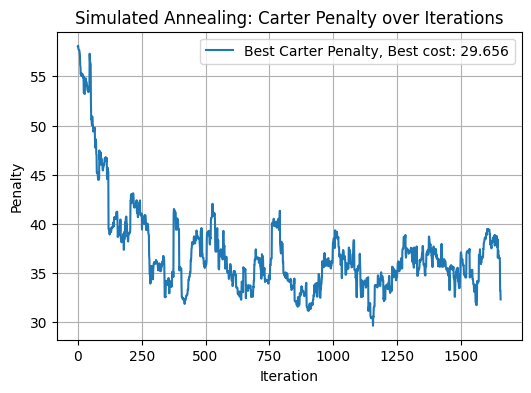

Cost: 29.655636363636365
Exam Timetable:
Timeslot 1: Exams [8, 21, 57, 71, 76, 80, 82, 94, 123, 127, 143, 147, 151, 158, 169]
Timeslot 2: Exams [1, 6, 9, 22, 36, 44, 48, 51, 75, 89, 115, 132, 133, 141, 148, 155, 167, 170, 177, 179, 184]
Timeslot 3: Exams [24, 32, 50, 55, 68, 69, 83, 97, 122, 128, 140, 163, 171, 180]
Timeslot 4: Exams [26, 42, 56, 78, 90, 124, 136, 160, 161, 172, 174, 183]
Timeslot 5: Exams [3, 5, 10, 12, 13, 15, 16, 31, 52, 70, 95, 102, 108, 109, 150, 175, 182]
Timeslot 6: Exams [18, 23, 39, 45, 46, 61, 74, 88, 106, 112, 119, 121, 146, 154, 168, 173]
Timeslot 7: Exams [4, 19, 35, 41, 47, 62, 65, 72, 92, 135, 142, 152, 166, 178]
Timeslot 8: Exams [25, 54, 59, 63, 67, 81, 91, 93, 117, 134, 153, 159, 165]
Timeslot 9: Exams [29, 37, 64, 66, 84, 86, 96, 157]
Timeslot 10: Exams [11, 14, 27, 40, 58, 73, 98, 100, 101, 103, 104, 105, 116, 120, 126, 129, 144]
Timeslot 11: Exams [2, 7, 20, 28, 33, 49, 53, 79, 85, 87, 111, 113, 114, 131, 137, 138, 149, 156, 162, 181]
Timeslot 12: 

In [152]:
# Plot cost over iterations
plt.figure(figsize=(6,4))
plt.plot(cost_history, label=f'Best Carter Penalty, Best cost: {best_cost:.3f}')
plt.xlabel('Iteration')
plt.ylabel('Penalty')
plt.title('Simulated Annealing: Carter Penalty over Iterations')
plt.legend()
plt.grid(True)
plt.show()

print('Cost:' , best_cost)
print_timetable(best_timetable)
check_timetable_conflicts(best_timetable, conflict_matrix)
check_missing_exams(best_timetable, len(conflict_matrix))
count_total_items(best_timetable)

## Temp accpetance rate

In [ ]:
acceptance_counts_without_kempe=acceptance_counts
temperatures_without_kempe=temperatures

In [ ]:
acceptance_counts_with_kempe=acceptance_counts
temperatures_with_kempe=temperatures

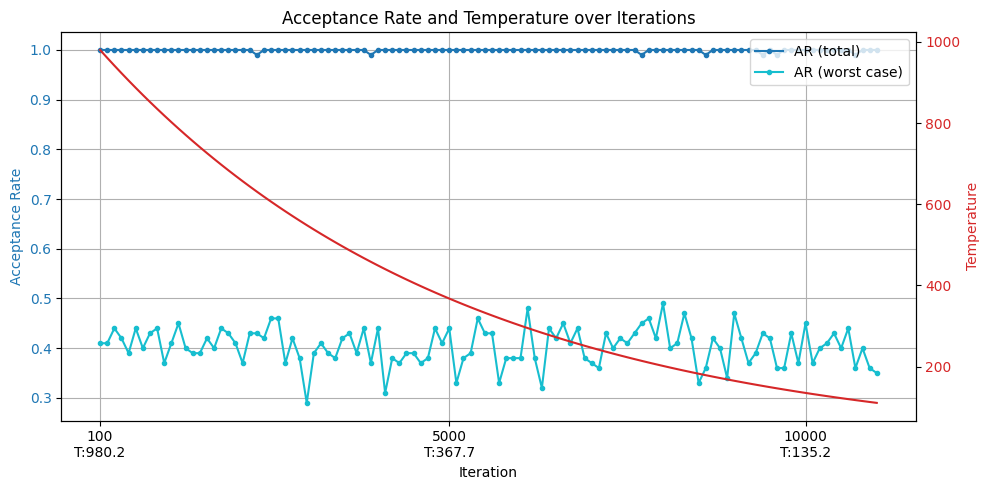

In [ ]:
n=5000  #gap for x


iterations, rates_improve, rates_worse = zip(*acceptance_counts)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(iterations, rates_improve, marker='o', color='tab:blue', label='AR (total)' ,markersize=3)
ax1.plot(iterations, rates_worse, marker='o', color='tab:cyan', label='AR (worst case)' ,markersize=3)

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Acceptance Rate', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)
ax1.legend(loc='upper right')
label_indices = [i for i in range(len(iterations)) if iterations[i] == 100 or iterations[i] % n == 0]
tick_positions = [iterations[i] for i in label_indices]
tick_labels = [f"{iterations[i]}\nT:{temperatures[i]:.1f}" for i in label_indices]
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels)


# Optional: show all x ticks or let matplotlib choose
# ax1.set_xticks(iterations)

# Secondary y-axis for temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature', color='tab:red')
ax2.plot(iterations, temperatures, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Acceptance Rate and Temperature over Iterations')
plt.tight_layout()
plt.show()


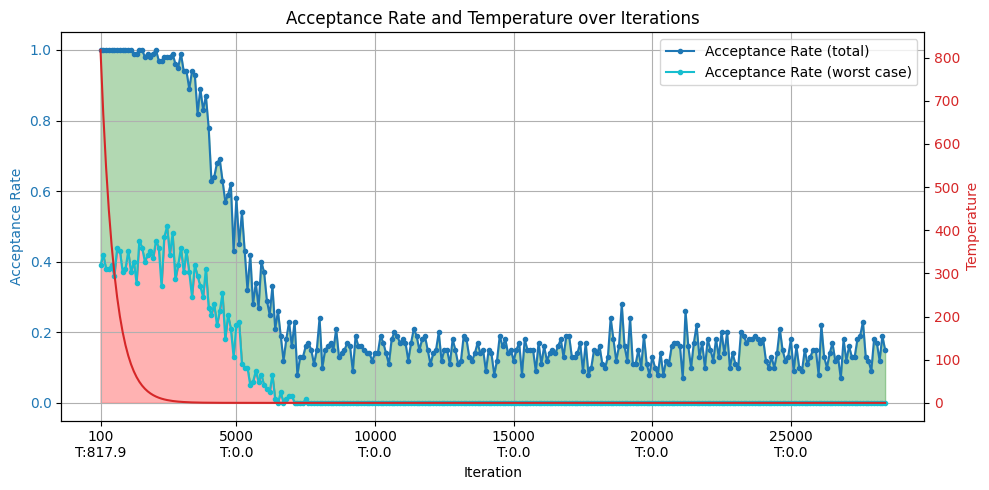

In [ ]:

iterations, rates_improve, rates_worse = zip(*acceptance_counts)

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot acceptance rates
ax1.plot(iterations, rates_improve, marker='o', color='tab:blue', label='Acceptance Rate (total)', markersize=3)
ax1.plot(iterations, rates_worse, marker='o', color='tab:cyan', label='Acceptance Rate (worst case)', markersize=3)

# Fill area between improve and worse in green
ax1.fill_between(iterations, rates_worse, rates_improve, color='green', alpha=0.3)

# Fill area between worse and 0 in red
ax1.fill_between(iterations, rates_worse, 0, color='red', alpha=0.3)

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Acceptance Rate', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)
ax1.legend(loc='upper right')

label_indices = [i for i in range(len(iterations)) if iterations[i] == 100 or iterations[i] % n == 0]
tick_positions = [iterations[i] for i in label_indices]
tick_labels = [f"{iterations[i]}\nT:{temperatures[i]:.1f}" for i in label_indices]
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels)

# Secondary y-axis for temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature', color='tab:red')
ax2.plot(iterations, temperatures, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Acceptance Rate and Temperature over Iterations')
plt.tight_layout()
plt.show()


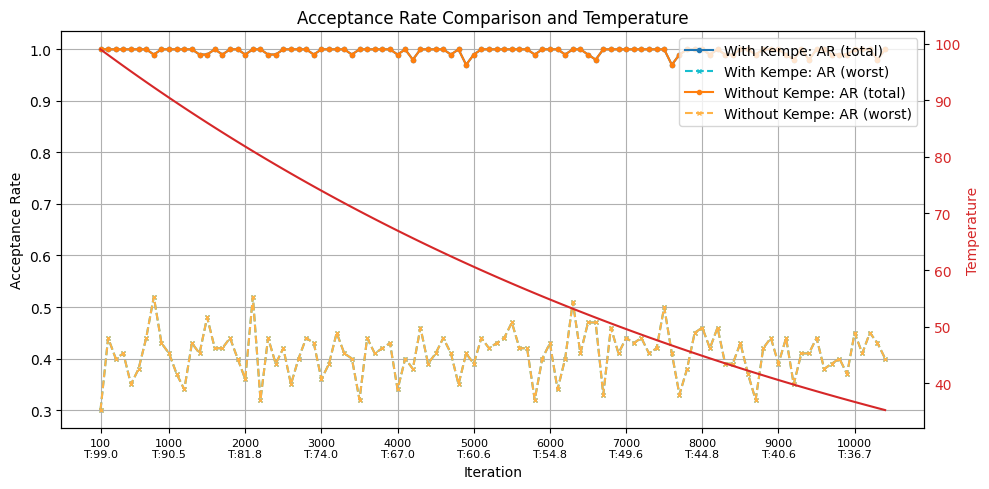

In [ ]:
# Unpack datasets
iterations1, improve1, worse1 = zip(*acceptance_counts_with_kempe)
iterations2, improve2, worse2 = zip(*acceptance_counts_without_kempe)

temps1 = temperatures_with_kempe
temps2 = temperatures_without_kempe

# Select the longer temperature list and corresponding iterations
if len(temps1) >= len(temps2):
    temps = temps1
    iterations = iterations1
else:
    temps = temps2
    iterations = iterations2

n = 1000  # label gap

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot acceptance rates for 'with Kempe'
ax1.plot(iterations1, improve1, marker='o', linestyle='-', color='tab:blue',
         label='With Kempe: AR (total)', markersize=3)
ax1.plot(iterations1, worse1, marker='x', linestyle='--', color='tab:cyan',
         label='With Kempe: AR (worst)', markersize=3)

# Plot acceptance rates for 'without Kempe'
ax1.plot(iterations2, improve2, marker='o', linestyle='-', color='tab:orange',
         label='Without Kempe: AR (total)', markersize=3)
ax1.plot(iterations2, worse2, marker='x', linestyle='--', color='#FFB347',
         label='Without Kempe: AR (worst)', markersize=3)

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Acceptance Rate')
ax1.grid(True)
ax1.legend(loc='upper right')

# X-axis tick labels with temperature from the longer dataset
label_indices = [i for i in range(len(iterations)) if iterations[i] == iterations[0] or iterations[i] % n == 0]
tick_positions = [iterations[i] for i in label_indices]
tick_labels = [
    f"{iterations[i]}\nT:{temps[i] if i < len(temps) else temps[-1]:.1f}"
    for i in label_indices
]
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(tick_labels, fontsize=8)

# Secondary y-axis for temperature (red line, from the longer dataset)
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature', color='tab:red')
ax2.plot(iterations, temps[:len(iterations)], color='tab:red', linestyle='-', label='Temperature')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Acceptance Rate Comparison and Temperature')
plt.tight_layout()
plt.show()


## Run n times for same settings

In [154]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import time
import csv
import random

# === Hyperparameters ===
cooling_rates = [0.999, 0.995, 0.99]
runs = 7
max_iter = 100000
initial_temp = 100
patience=10000
show_progress = 3000
max_timeslots = expected_timeslots  # Replace with an integer if needed


# === Prepare Initial Timetable ===
timetable_base = copy.deepcopy(timetableSD)
for t in range(1, max_timeslots):
    if t not in timetable_base:
        timetable_base[t] = []

# === Results Storage ===
summary_results = []
header = ["Cooling_Rate"] + ["Mean_Cost", "Std_Dev", "Avg_Time"] + [f"Run_{i+1}" for i in range(runs)]

# === Run for each cooling rate ===
for rate in cooling_rates:
    print(f"\n=== Cooling Rate: {rate} ===")
    all_costs = []
    all_times = []

    for run in range(runs):
        print(f"\nRun {run + 1} / {runs}")

        # Set seeds
        seed_val = time.time_ns() % (2**32)
        random.seed(seed_val)
        np.random.seed(seed_val)

        # Reset timetable
        timetable = copy.deepcopy(timetable_base)

        # Run simulated annealing
        best_timetable, best_cost, cost_history, duration,kempe_count_list,acceptance_counts,temperatures,ejection_count_list = simulated_annealing(
            timetable,
            conflict_matrix,
            max_timeslots=max_timeslots,
            initial_temp=initial_temp,
            cooling_rate=rate,
            max_iter=max_iter,
            patience=patience,
            verbose=True,
            show_progress=show_progress
        )

        # Post checks
        check_missing_exams(best_timetable, len(conflict_matrix))
        count_total_items(best_timetable)

        # Save results
        all_costs.append(best_cost)
        all_times.append(duration)

    # === Stats ===
    mean_cost = np.mean(all_costs)
    std_cost = np.std(all_costs)
    mean_time = np.mean(all_times)

    print(f"\nSummary for Cooling Rate {rate}:")
    print(f"  Mean Carter penalty: {mean_cost:.2f}")
    print(f"  Std deviation       : {std_cost:.2f}")
    print(f"  Best Carter penalty : {np.min(all_costs):.2f}")
    print(f"  Average run time    : {mean_time:.2f} seconds")

    # === Store Row for CSV ===
    row = [rate] + [mean_cost, std_cost, mean_time] + all_costs
    summary_results.append(row)



=== Cooling Rate: 0.999 ===

Run 1 / 7
Iteration 0, Temp: 99.90, Best cost: 58.243272727272725
Iteration 3000, Temp: 54.81, Best cost: 29.945454545454545
Iteration 6000, Temp: 30.07, Best cost: 29.945454545454545
Iteration 9000, Temp: 16.50, Best cost: 29.945454545454545
Iteration 11742, Temp: 9.54, Best cost: 29.945454545454545
Stopping early at iteration 11742 due to no improvement.

Simulated annealing completed in 83.46 seconds.
✅ All exams are scheduled.
Exam numbers: 184

Run 2 / 7
Iteration 0, Temp: 99.90, Best cost: 55.66945454545454
Iteration 3000, Temp: 54.81, Best cost: 29.907272727272726
Iteration 6000, Temp: 30.07, Best cost: 29.907272727272726
Iteration 9000, Temp: 16.50, Best cost: 29.349454545454545
Iteration 12000, Temp: 9.05, Best cost: 29.349454545454545
Iteration 15000, Temp: 4.97, Best cost: 29.349454545454545
Iteration 18000, Temp: 2.72, Best cost: 29.290545454545455
Iteration 21000, Temp: 1.49, Best cost: 28.89709090909091
Iteration 24000, Temp: 0.82, Best cost:

In [157]:
# === Save summary results to CSV ===
with open("simulated_annealing_summary.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)            # e.g., Cooling_Rate, Run_1, ..., Mean_Cost, Std_Dev, Avg_Time
    writer.writerows(summary_results)


In [159]:


# === Save summary results to CSV ===
with open("simulated_annealing_summary.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)            # e.g., Cooling_Rate, Run_1, ..., Mean_Cost, Std_Dev, Avg_Time
    writer.writerows(summary_results)

# === Prepare data for ANOVA & Tukey ===
anova_data = []
anova_labels = []

for row in summary_results:
    cooling_rate = row[0]
    run_costs = row[1:1 + runs]
    anova_data.append(run_costs)
    anova_labels.extend([str(cooling_rate)] * runs)

flattened_costs = [cost for sublist in anova_data for cost in sublist]

# === Run ANOVA ===
f_stat, p_value = f_oneway(*anova_data)

# === Run Tukey HSD ===
df = pd.DataFrame({
    'Cost': flattened_costs,
    'CoolingRate': anova_labels
})
tukey_result = pairwise_tukeyhsd(endog=df['Cost'], groups=df['CoolingRate'], alpha=0.05)

# === Append ANOVA and Tukey results to the same CSV ===
with open("simulated_annealing_summary.csv", mode="a", newline="") as file:
    writer = csv.writer(file)

    # Blank line and ANOVA header
    writer.writerow([])
    writer.writerow(["ANOVA Test"])
    writer.writerow(["F-statistic", f"{f_stat:.4f}"])
    writer.writerow(["P-value", f"{p_value:.4f}"])

    # Tukey test header
    writer.writerow([])
    writer.writerow(["ukey HSD Results"])
    writer.writerow(["Group1", "Group2", "Mean Diff", "p-adj", "Lower", "Upper", "Reject"])

    # Tukey rows
    for row in tukey_result.summary().data[1:]:  # Skip header
        writer.writerow(row)

print("\n✅ All results and ANOVA + Tukey analysis saved to 'simulated_annealing_summary.csv'")



✅ All results and ANOVA + Tukey analysis saved to 'simulated_annealing_summary.csv'


In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
import pandas as pd

# ------------------------------------------------------------------
# Step 0 :  make sure you have statsmodels
# pip install statsmodels  (if you have not done so)
# ------------------------------------------------------------------

# === Step 1: Extract run data ===
anova_data  = []     # list of lists → each inner list is 10 runs
group_names = []     # names for printing / Tukey

for row in summary_results:
    run_costs = row[4 : 4 + runs]          # Run1 … Run10
    anova_data.append(run_costs)
    group_names.append(row[0])             # assuming col‑0 stores “Cooling‑0.90” etc.

# === Step 2: Run one‑way ANOVA ===
f_stat, p_value = f_oneway(*anova_data)

print("\n=== ANOVA Result ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value    : {p_value:.4f}")

# === Step 3: Tukey HSD post‑hoc (only if ANOVA is significant) ===
if p_value < 0.05:
    print("\n🔍  Performing Tukey HSD (α = 0.05)")

    # Flatten data → one long vector + matching group labels
    data_flat  = np.concatenate(anova_data)
    labels_flat = np.concatenate([[g] * runs for g in group_names])

    tukey = pairwise_tukeyhsd(endog=data_flat,
                              groups=labels_flat,
                              alpha=0.05)

    # Pretty‑print with pandas for nicer alignment
    tukey_table = pd.DataFrame(data=tukey._results_table.data[1:],  # skip header row here
                               columns=tukey._results_table.data[0])

    print(tukey_table.to_string(index=False))

    # Optional:  Tukey plot
    # tukey.plot_simultaneous(figsize=(8,4))
    # plt.show()

else:
    print("❌ No significant difference between cooling rates (fail to reject H₀)")




=== ANOVA Result ===
F-statistic: 5.6320
P-value    : 0.0126

🔍  Performing Tukey HSD (α = 0.05)
 group1  group2  meandiff  p-adj   lower  upper  reject
  0.990   0.995   -0.1198 0.9836 -1.8827 1.6431   False
  0.990   0.999    1.9451 0.0293  0.1822 3.7080    True
  0.995   0.999    2.0649 0.0204  0.3020 3.8278    True


# Genetic Algorithm



In [83]:
def genetic_algorithm(timetable, conflict_matrix, max_timeslots, max_iter, patience,
                      population_size=30, mutation_rate=0.2, show_progress=10, crossover_n=1):
    start_time = time.time()

    population = [create_individual(timetable, max_timeslots, conflict_matrix) for _ in range(population_size - 1)]
    population.append(copy.deepcopy(timetable))

    best_individual = None
    best_cost = float('inf')
    cost_history = []
    kempe_count_list = []
    no_improve_count = 0

    div = population_diversity(population, len(conflict_matrix))
    print(f"Built population of size: {len(population)}")
    print(f"Average diversity: {div:.2f}")

    for t in range(1, max_timeslots):
      if t not in timetable:
        timetable[t] = []

    for gen in range(max_iter):
        population.sort(key=lambda ind: calculate_proximity_cost(ind, conflict_matrix))
        current_best = population[0]
        current_cost = calculate_proximity_cost(current_best, conflict_matrix)
        cost_history.append(current_cost)

        if gen % show_progress == 0 or gen == max_iter - 1:
            print(f"Generation {gen+1}, Best Cost: {current_cost}")

        if current_cost < best_cost:
            best_cost = current_cost
            best_individual = current_best
            no_improve_count = 0
        else:
            no_improve_count += 1

        if no_improve_count >= patience:
            print(f"Generation {gen+1}, Best Cost: {current_cost}")
            print(f"Stopped early at generation {gen+1}")
            break

        selected = population[:population_size // 2]
        children = []

        while len(children) < population_size - len(selected):
            p1 = tournament_selection(selected, conflict_matrix)
            p2 = tournament_selection(selected, conflict_matrix)

            # Pass crossover parameter here
            child = crossover(p1, p2, max_timeslots, conflict_matrix, n=crossover_n)
            #child = gpx_crossover(p1, p2, max_timeslots, conflict_matrix)

            child = fix_missing_exams(child, conflict_matrix, max_timeslots)
            if random.random() < mutation_rate:
                child, kempe_count = mutate(child, max_timeslots, conflict_matrix)
                kempe_count_list.append(kempe_count)
            children.append(child)

        population = selected + children

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"\nGenetic Algorithm completed in {elapsed_time:.2f} seconds.")
    return best_individual, best_cost, cost_history, elapsed_time,kempe_count_list


## Single testing

In [84]:
max_iter = 5000
population_size = 30
mutation_rate = 0.2
patience = 100
show_progress = 30



max_timeslots = expected_timeslots


# === Prepare Timetable Copy ===
timetable = copy.deepcopy(timetableSD)

# Ensure all timeslots are initialized
for t in range(1, max_timeslots):
    if t not in timetable:
        timetable[t] = []

# === Count Exams ===
count_total_items(timetable)
print('Initial Cost:', calculate_proximity_cost(timetable, conflict_matrix))

# === Run Genetic Algorithm ===
best_timetable, best_cost, cost_history, duration,kempe_count_list = genetic_algorithm(
    timetable, conflict_matrix, max_timeslots,
    max_iter, patience, population_size, mutation_rate, show_progress
)

check_missing_exams(best_timetable, len(conflict_matrix))
count_total_items(best_timetable)


Exam numbers: 80
Initial Cost: 27.852639036486007
Built population of size: 30
Average diversity: 0.96
Generation 1, Best Cost: 15.974495217853347
Generation 31, Best Cost: 14.07934821112292
Generation 61, Best Cost: 12.920297555791711
Generation 91, Best Cost: 12.393552957846262
Generation 121, Best Cost: 11.563939071909317
Generation 151, Best Cost: 11.22529224229543
Generation 181, Best Cost: 11.014523556500178
Generation 211, Best Cost: 10.84024087849805
Generation 241, Best Cost: 10.523202267091746
Generation 271, Best Cost: 10.437832093517535
Generation 301, Best Cost: 10.34750265674814
Generation 331, Best Cost: 10.167198016294721
Generation 361, Best Cost: 10.139213602550479
Generation 391, Best Cost: 9.996811902231668
Generation 421, Best Cost: 9.85759829968119
Generation 451, Best Cost: 9.766206163655685
Generation 481, Best Cost: 9.766206163655685
Generation 511, Best Cost: 9.468296138859369
Generation 541, Best Cost: 9.419057739992915
Generation 571, Best Cost: 9.3722989727

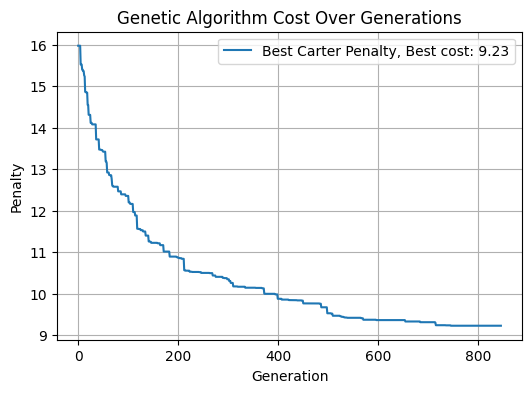

Cost: 9.228126106978392
Exam Timetable:
Timeslot 1: Exams [5, 6, 7, 8, 39, 43, 51, 60, 65]
Timeslot 2: Exams [19, 50]
Timeslot 3: Exams [17, 18, 37, 57, 78]
Timeslot 4: Exams [21, 45, 75]
Timeslot 5: Exams [3, 20, 68]
Timeslot 6: Exams [4, 16, 54, 64, 73]
Timeslot 7: Exams [24, 49, 77]
Timeslot 8: Exams [9, 31, 55, 71, 80]
Timeslot 9: Exams [27, 56]
Timeslot 10: Exams [10, 14, 40, 46, 59]
Timeslot 11: Exams [11, 15, 34, 70]
Timeslot 12: Exams [48, 53, 74]
Timeslot 13: Exams [23, 63]
Timeslot 14: Exams [26, 41, 44, 79]
Timeslot 15: Exams [13, 32, 52, 61, 67]
Timeslot 16: Exams [12, 30, 38]
Timeslot 17: Exams [33, 69]
Timeslot 18: Exams [25, 58, 62, 72]
Timeslot 19: Exams [1, 28, 29, 36, 42]
Timeslot 20: Exams [2, 22, 35, 47, 66, 76]
Checking for exam conflicts...
Timeslot 1: ✅ No conflicts
Timeslot 2: ✅ No conflicts
Timeslot 3: ✅ No conflicts
Timeslot 4: ✅ No conflicts
Timeslot 5: ✅ No conflicts
Timeslot 6: ✅ No conflicts
Timeslot 7: ✅ No conflicts
Timeslot 8: ✅ No conflicts
Timeslot 9:

In [86]:
# Plot cost over iterations
plt.figure(figsize=(6,4))
plt.plot(cost_history, label=f'Best Carter Penalty, Best cost: {best_cost:.2f}')
plt.xlabel('Generation')
plt.ylabel('Penalty')
plt.title('Genetic Algorithm Cost Over Generations')
plt.legend()
plt.grid(True)
plt.show()

print('Cost:' , best_cost)
print_timetable(best_timetable)
check_timetable_conflicts(best_timetable, conflict_matrix)
check_missing_exams(best_timetable, len(conflict_matrix))
count_total_items(best_timetable)



## Run n times for same settings

In [88]:
import csv
import copy
import random
import numpy as np
import matplotlib.pyplot as plt

# === Hyperparameters ===
runs = 7
max_iter = 5000
population_size = 30
mutation_rate = 0.2
patience = 100
show_progress = 50
max_timeslots = expected_timeslots

crossover_values = [1,2,3]  # The crossover parameters you want to test

# Prepare base timetable once
timetable_base = copy.deepcopy(timetableSD)
for t in range(1, max_timeslots):
    if t not in timetable_base:
        timetable_base[t] = []

# Prepare CSV to save all results
header = ["Crossover", "Mean_Cost", "Std_Dev", "Avg_Time"] + [f"Run_{i+1}" for i in range(runs)]
results_rows = []

for c in crossover_values:
    print(f"\n=== Testing Crossover = {c} ===")

    all_costs = []
    total_times = []
    max_generations_seen = 0

    plt.figure(figsize=(10, 6))

    for run in range(runs):
        print(f"\nRun {run+1} / {runs}, Crossover={c}")

        seed_val = time.time_ns() % (2**32)
        random.seed(seed_val)
        np.random.seed(seed_val)

        timetable = copy.deepcopy(timetable_base)
        count_total_items(timetable)

        print("Initial Cost:", calculate_proximity_cost(timetable, conflict_matrix))

        best_timetable, best_cost, cost_history, duration,_ = genetic_algorithm(
            timetable, conflict_matrix, max_timeslots, max_iter, patience,
            population_size, mutation_rate, show_progress, crossover_n=c
        )

        # Validate result
        count_total_items(best_timetable)
        check_missing_exams(best_timetable, len(conflict_matrix))

        all_costs.append(best_cost)
        total_times.append(duration)
        max_generations_seen = max(max_generations_seen, len(cost_history))

        padded_history = cost_history + [cost_history[-1]] * (max_iter - len(cost_history))

    mean_cost = np.mean(all_costs)
    std_cost = np.std(all_costs)
    mean_time = np.mean(total_times)

    print(f"\nSummary for Crossover = {c}:")
    print(f"  Mean Carter penalty: {mean_cost:.2f}")
    print(f"  Std deviation       : {std_cost:.2f}")
    print(f"  Average run time    : {mean_time:.2f} seconds")

    # Save row for this crossover
    row = [f"Genetic_{c}"] + [mean_cost, std_cost, mean_time] + all_costs
    results_rows.append(row)





=== Testing Crossover = 1 ===

Run 1 / 7, Crossover=1
Exam numbers: 80
Initial Cost: 27.852639036486007
Built population of size: 30
Average diversity: 0.96
Generation 1, Best Cost: 15.331916400991853
Generation 51, Best Cost: 12.806588735387885
Generation 101, Best Cost: 11.721927027984414
Generation 151, Best Cost: 11.132483173928446
Generation 201, Best Cost: 10.83528161530287
Generation 251, Best Cost: 10.760538434289762
Generation 301, Best Cost: 10.438186326602905
Generation 351, Best Cost: 10.361671980162948
Generation 401, Best Cost: 10.32731137088204
Generation 451, Best Cost: 10.150549061282323
Generation 501, Best Cost: 10.14311016648955
Generation 551, Best Cost: 10.058448459086078
Generation 601, Best Cost: 10.043570669500532
Generation 651, Best Cost: 10.022316684378321
Generation 701, Best Cost: 9.963868225292241
Generation 751, Best Cost: 9.963868225292241
Generation 799, Best Cost: 9.963868225292241
Stopped early at generation 799

Genetic Algorithm completed in 108.2

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [90]:
import csv
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# === Save main results to CSV ===
with open("genetic_algorithm_summary.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(results_rows)

    # === Prepare data for ANOVA ===
    anova_data = []
    anova_labels = []

    for row in results_rows:
        label = row[0]  # e.g. "Crossover_1"
        costs = row[4:]  # Only the run costs (assumed numerical)
        # Convert costs to float in case they are strings
        costs = [float(c) for c in costs]
        anova_data.append(costs)
        anova_labels.extend([label] * len(costs))

    flattened_costs = [cost for sublist in anova_data for cost in sublist]

    # === Run ANOVA ===
    f_stat, p_value = f_oneway(*anova_data)

    # === Write ANOVA summary to CSV ===
    writer.writerow([])
    writer.writerow(["ANOVA Summary"])
    writer.writerow(["F-statistic", f"{f_stat:.4f}"])
    writer.writerow(["P-value", f"{p_value:.4f}"])

    # === Tukey HSD if ANOVA significant ===
    if p_value < 1:
        df = pd.DataFrame({
            'Cost': flattened_costs,
            'Crossover': anova_labels
        })
        tukey = pairwise_tukeyhsd(endog=df['Cost'], groups=df['Crossover'], alpha=0.05)

        writer.writerow([])
        writer.writerow(["Tukey HSD Pairwise Comparisons"])
        # Write header of Tukey summary
        tukey_summary = tukey.summary()
        for line in tukey_summary.data:
            writer.writerow(line)

print("\n✅ All results and ANOVA analysis saved to 'genetic_algorithm_summary.csv'")



✅ All results and ANOVA analysis saved to 'genetic_algorithm_summary.csv'


In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# === Prepare data for ANOVA ===
anova_data = []
anova_labels = []

for row in results_rows:
    label = row[0]  # e.g. "Crossover_1"
    costs = row[4:]  # Only the run costs
    anova_data.append(costs)
    anova_labels.extend([label] * len(costs))

flattened_costs = [cost for sublist in anova_data for cost in sublist]

# === Run ANOVA ===
f_stat, p_value = f_oneway(*anova_data)
print("\n=== ANOVA Result ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value    : {p_value:.4f}")

# === Tukey HSD if ANOVA is significant ===
if p_value < 0.05:
    df = pd.DataFrame({
        'Cost': flattened_costs,
        'Crossover': anova_labels
    })
    tukey = pairwise_tukeyhsd(endog=df['Cost'], groups=df['Crossover'], alpha=0.05)
    print("\n=== Tukey HSD Result ===")
    print(tukey.summary())
else:
    print("No significant difference between crossover strategies (fail to reject H₀).")


In [ ]:
print('Cost:' , best_cost)
print_timetable(best_timetable)
check_timetable_conflicts(best_timetable, conflict_matrix)
count_total_items(best_timetable)


# Memetic algorithm

In [ ]:
def memetic_algorithm(timetable, conflict_matrix, max_timeslots, max_iter, patience,
                      population_size=30, mutation_rate=0.2, show_progress=10,crossover_n=1):

    start_time = time.time()
    population = [create_individual(timetable, max_timeslots, conflict_matrix) for _ in range(population_size - 1)]
    population.append(copy.deepcopy(timetable))

    div = population_diversity(population, len(conflict_matrix))
    print(f"Built population of size: {len(population)}")
    print(f"Average diversity: {div:.2f}")

    best_individual = None
    best_cost = float('inf')
    cost_history = []
    kempe_count_list = []
    no_improve_count = 0

    for t in range(1, max_timeslots):
      if t not in timetable:
        timetable[t] = []

    for gen in range(max_iter):
        population.sort(key=lambda ind: calculate_proximity_cost(ind, conflict_matrix))
        current_best = population[0]
        current_cost = calculate_proximity_cost(current_best, conflict_matrix)
        cost_history.append(current_cost)

        if gen % show_progress == 0 or gen == max_iter - 1:
            print(f"Generation {gen+1}, Best Cost: {current_cost}")

        if current_cost < best_cost:
            best_cost = current_cost
            best_individual = current_best
            no_improve_count = 0
        else:
            no_improve_count += 1

        if no_improve_count >= patience:
            print(f"Generation {gen+1}, Best Cost: {current_cost}")
            print(f"Stopped early at generation {gen+1}")
            break

        selected = population[:population_size // 2]
        children = []

        while len(children) < population_size - len(selected):
            p1 = tournament_selection(selected, conflict_matrix)
            p2 = tournament_selection(selected, conflict_matrix)

            child = crossover(p1, p2, max_timeslots, conflict_matrix, n=crossover_n)
            if random.random() < mutation_rate:
                child, kempe_count = mutate(child, max_timeslots, conflict_matrix)
                kempe_count_list.append(kempe_count)

            child, _, _, _, _, _, _, _ = simulated_annealing(child, conflict_matrix, max_timeslots=max_timeslots, initial_temp=100, cooling_rate=0.95, max_iter=1000, patience=50, verbose= False)

            child = fix_missing_exams(child, conflict_matrix, max_timeslots)

            children.append(child)

        population = selected + children

    end_time = time.time()  # End timing
    elapsed_time = end_time - start_time
    print(f"\nMemetic Algorithm completed in {elapsed_time:.2f} seconds.")

    return best_individual, best_cost, cost_history, elapsed_time,kempe_count_list

## Single testing

In [ ]:
max_iter = 5000
population_size = 30
mutation_rate = 0.2
patience = 10
show_progress = 1

max_timeslots = expected_timeslots

timetable = copy.deepcopy(timetableSD)

print('Initial Cost: ' , calculate_proximity_cost(timetable,conflict_matrix))
for t in range(1, max_timeslots):
    if t not in timetable:
        timetable[t] = []

best_timetable, best_cost, cost_history, duration,kempe_count_list = memetic_algorithm(
    timetable, conflict_matrix, max_timeslots, max_iter, patience, population_size, mutation_rate, show_progress)



Initial Cost:  16.492434662998626
Built population of size: 30
Average pairwise Hamming distance (diversity): 253.77
Generation 1, Best Cost: 13.735900962861074
Generation 2, Best Cost: 10.655433287482806
Generation 3, Best Cost: 10.646263182026594
Generation 4, Best Cost: 10.53920220082531
Generation 5, Best Cost: 10.47890875745071
Generation 6, Best Cost: 10.47890875745071
Generation 7, Best Cost: 10.465382851902797
Generation 8, Best Cost: 10.386061439706557
Generation 9, Best Cost: 10.3707015130674
Generation 10, Best Cost: 10.280834479596516
Generation 11, Best Cost: 10.280834479596516
Generation 12, Best Cost: 10.280834479596516
Generation 13, Best Cost: 10.17537826685007
Generation 14, Best Cost: 10.079092159559835
Generation 15, Best Cost: 10.048372306281522
Generation 16, Best Cost: 9.99656121045392
Generation 17, Best Cost: 9.992205410362219
Generation 18, Best Cost: 9.837918386061439
Generation 19, Best Cost: 9.837918386061439
Generation 20, Best Cost: 9.675149014213664
Gene

In [ ]:
# Plot cost over iterations
plt.figure(figsize=(6,4))
plt.plot(cost_history, label=f'Best Carter Penalty, Best cost: {best_cost:.2f}')
plt.xlabel('Generation')
plt.ylabel('Penalty')
plt.title('Memetic Algorithm Cost Over Generations')
plt.legend()
plt.grid(True)
plt.show()

print('Cost:' , best_cost)
print_timetable(best_timetable)
check_timetable_conflicts(best_timetable, conflict_matrix)
check_missing_exams(best_timetable, len(conflict_matrix))
count_total_items(best_timetable)


## Run n times for same settings


In [ ]:
import csv
import copy
import random
import numpy as np
import matplotlib.pyplot as plt

# === Hyperparameters ===
runs = 7
max_iter = 5000
population_size = 30
mutation_rate = 0.2
patience = 50
show_progress = 30
max_timeslots = expected_timeslots

crossover_values = [1, 2, 3]  # The crossover parameters you want to test

# Prepare base timetable once
timetable_base = copy.deepcopy(timetableSD)
for t in range(1, max_timeslots):
    if t not in timetable_base:
        timetable_base[t] = []

# Prepare CSV to save all results
header = ["Crossover", "Mean_Cost", "Std_Dev", "Avg_Time"] + [f"Run_{i+1}" for i in range(runs)]
results_rows = []

for c in crossover_values:
    print(f"\n=== Testing Crossover = {c} ===")

    all_costs = []
    total_times = []
    max_generations_seen = 0

    plt.figure(figsize=(10, 6))

    for run in range(runs):
        print(f"\nRun {run+1} / {runs}, Crossover={c}")

        seed_val = time.time_ns() % (2**32)
        random.seed(seed_val)
        np.random.seed(seed_val)

        timetable = copy.deepcopy(timetable_base)
        count_total_items(timetable)

        print("Initial Cost:", calculate_proximity_cost(timetable, conflict_matrix))

        best_timetable, best_cost, cost_history, duration = memetic_algorithm(
            timetable, conflict_matrix, max_timeslots, max_iter, patience,
            population_size, mutation_rate, show_progress, crossover_n=c
        )

        # Validate result
        count_total_items(best_timetable)
        check_missing_exams(best_timetable, len(conflict_matrix))

        all_costs.append(best_cost)
        total_times.append(duration)
        max_generations_seen = max(max_generations_seen, len(cost_history))

        padded_history = cost_history + [cost_history[-1]] * (max_iter - len(cost_history))

    mean_cost = np.mean(all_costs)
    std_cost = np.std(all_costs)
    mean_time = np.mean(total_times)

    print(f"\nSummary for Crossover = {c}:")
    print(f"  Mean Carter penalty: {mean_cost:.2f}")
    print(f"  Std deviation       : {std_cost:.2f}")
    print(f"  Average run time    : {mean_time:.2f} seconds")

    # Save row for this crossover
    row = [f"Memetic_{c}"] + [mean_cost, std_cost, mean_time] + all_costs
    results_rows.append(row)




In [ ]:
import csv
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# === Save main results to CSV ===
with open("memetic_algorithm_summary.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(results_rows)

    # === Prepare data for ANOVA ===
    anova_data = []
    anova_labels = []

    for row in results_rows:
        label = row[0]  # e.g. "Crossover_1"
        costs = row[4:]  # Only the run costs (assumed numerical)
        # Convert costs to float in case they are strings
        costs = [float(c) for c in costs]
        anova_data.append(costs)
        anova_labels.extend([label] * len(costs))

    flattened_costs = [cost for sublist in anova_data for cost in sublist]

    # === Run ANOVA ===
    f_stat, p_value = f_oneway(*anova_data)

    # === Write ANOVA summary to CSV ===
    writer.writerow([])
    writer.writerow(["ANOVA Summary"])
    writer.writerow(["F-statistic", f"{f_stat:.4f}"])
    writer.writerow(["P-value", f"{p_value:.4f}"])

    # === Tukey HSD if ANOVA significant ===
    if p_value < 1.05:
        df = pd.DataFrame({
            'Cost': flattened_costs,
            'Crossover': anova_labels
        })
        tukey = pairwise_tukeyhsd(endog=df['Cost'], groups=df['Crossover'], alpha=0.05)

        writer.writerow([])
        writer.writerow(["Tukey HSD Pairwise Comparisons"])
        # Write header of Tukey summary
        tukey_summary = tukey.summary()
        for line in tukey_summary.data:
            writer.writerow(line)

print("\n✅ All results and ANOVA analysis saved to 'genetic_algorithm_summary.csv'")


In [ ]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# === Prepare data for ANOVA ===
anova_data = []
anova_labels = []

for row in results_rows:
    label = row[0]  # e.g. "Crossover_1"
    costs = row[4:]  # Only the run costs
    anova_data.append(costs)
    anova_labels.extend([label] * len(costs))

flattened_costs = [cost for sublist in anova_data for cost in sublist]

# === Run ANOVA ===
f_stat, p_value = f_oneway(*anova_data)
print("\n=== ANOVA Result ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value    : {p_value:.4f}")

# === Tukey HSD if ANOVA is significant ===
if p_value < 0.05:
    df = pd.DataFrame({
        'Cost': flattened_costs,
        'Crossover': anova_labels
    })
    tukey = pairwise_tukeyhsd(endog=df['Cost'], groups=df['Crossover'], alpha=0.05)
    print("\n=== Tukey HSD Result ===")
    print(tukey.summary())
else:
    print("No significant difference between crossover strategies (fail to reject H₀).")


In [ ]:
print('Cost:' , best_cost)
print_timetable(best_timetable)
check_timetable_conflicts(best_timetable, conflict_matrix)
check_missing_exams(best_timetable, len(conflict_matrix))
count_total_items(best_timetable)


# Kempe chain count bar char

In [ ]:
len(kempe_count_list)

5414

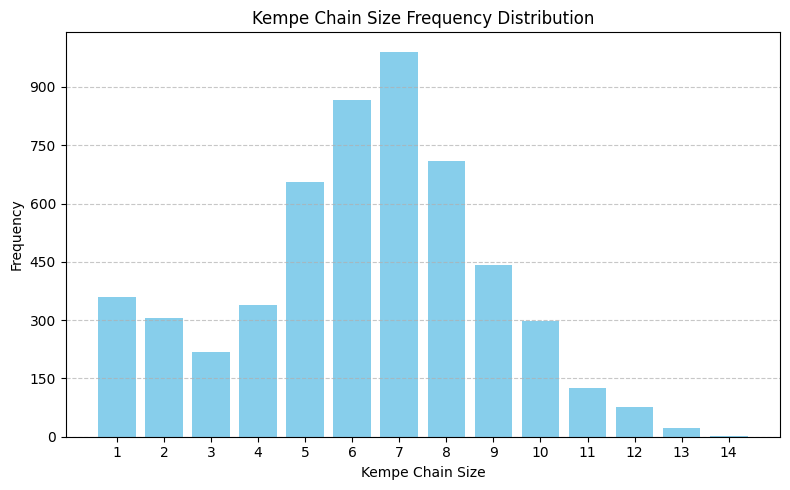

In [ ]:

kempe_count_list = [x for x in kempe_count_list if x is not None]
count_dict = Counter(kempe_count_list)
max_size = max(kempe_count_list)
sizes = list(range(1,max_size + 1))
frequencies = [count_dict.get(size, 0) for size in sizes]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(sizes, frequencies, color='skyblue')
plt.xlabel("Kempe Chain Size")
plt.ylabel("Frequency")
plt.title("Kempe Chain Size Frequency Distribution")
plt.xticks(sizes)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
max_size = 0
for run_list in all_kempe_counts:
    if run_list:
        max_size = max(max_size, max(run_list))

sizes = list(range(1, max_size + 1))
bar_width = 0.8 / len(all_kempe_counts)  # width per run in grouped bar

fig, ax = plt.subplots(figsize=(10,6))

for i, run_list in enumerate(all_kempe_counts):
    count_dict = Counter(run_list)
    frequencies = [count_dict.get(size, 0) for size in sizes]
    positions = np.array(sizes) - 0.4 + i * bar_width + bar_width/2
    ax.bar(positions, frequencies, width=bar_width, label=f'Run {i+1}')

ax.set_xlabel('Kempe Chain Size')
ax.set_ylabel('Frequency')
ax.set_title('Kempe Chain Size Frequencies per Run')
ax.set_xticks(sizes)
ax.legend()
plt.show()


NameError: name 'all_kempe_counts' is not defined

# Ejection chain count bar char

In [ ]:
len(ejection_count_list)

845

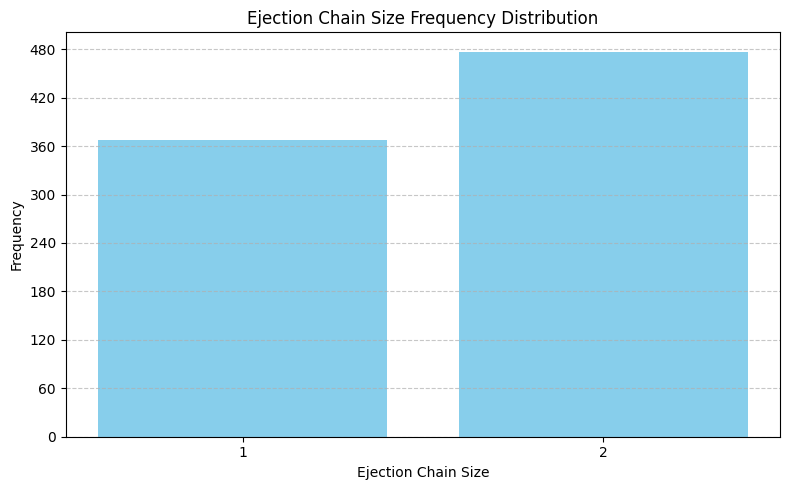

In [ ]:

ejection_count_list = [x for x in ejection_count_list if x is not None]
count_dict = Counter(ejection_count_list)
max_size = max(ejection_count_list)
sizes = list(range(1,max_size + 1))
frequencies = [count_dict.get(size, 0) for size in sizes]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(sizes, frequencies, color='skyblue')
plt.xlabel("Ejection Chain Size")
plt.ylabel("Frequency")
plt.title("Ejection Chain Size Frequency Distribution")
plt.xticks(sizes)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#Hypothesis testing

In [ ]:
from scipy.stats import shapiro
import pandas as pd

df = pd.read_csv('/content/Compare of three best.csv')

methods = ['SA', 'Gene', 'Meme']

for i, method in enumerate(methods):
    data = pd.to_numeric(df.iloc[i], errors='coerce').dropna()
    stat, p = shapiro(data)
    normal = "✅" if p >= 0.05 else "❌"
    print(f"{method}: Shapiro-Wilk p = {p:.4f} {normal}")


SA: Shapiro-Wilk p = 0.0001 ❌
Gene: Shapiro-Wilk p = 0.7952 ✅
Meme: Shapiro-Wilk p = 0.5686 ✅


In [ ]:
from scipy.stats import f_oneway

data_sa = pd.to_numeric(df.iloc[0], errors='coerce').dropna()
data_gene = pd.to_numeric(df.iloc[1], errors='coerce').dropna()
data_meme = pd.to_numeric(df.iloc[2], errors='coerce').dropna()

# One-way ANOVA
f_stat, p_value = f_oneway(data_sa, data_gene, data_meme)
print(f"\nANOVA F-statistic: {f_stat:.4f}")
print(f"ANOVA p-value    : {p_value:.4f}")

if p_value < 0.05:
    print("✅ Significant difference between at least two methods")
else:
    print("❌ No significant difference between methods")



ANOVA F-statistic: 37.9454
ANOVA p-value    : 0.0000
✅ Significant difference between at least two methods


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Combine all data and labels
all_data = np.concatenate([data_sa, data_gene, data_meme])
labels = ['SA']*len(data_sa) + ['Gene']*len(data_gene) + ['Meme']*len(data_meme)

# Tukey HSD
tukey = pairwise_tukeyhsd(endog=all_data, groups=labels, alpha=0.05)
print("\n=== Tukey HSD Result ===")
print(tukey.summary())



=== Tukey HSD Result ===
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Gene   Meme   0.1509 0.7877 -0.4303  0.7321  False
  Gene     SA  -1.6375    0.0 -2.2187 -1.0564   True
  Meme     SA  -1.7884    0.0 -2.3696 -1.2073   True
----------------------------------------------------


In [ ]:
print(f"SA mean   : {data_sa.mean():.4f}")
print(f"Gene mean : {data_gene.mean():.4f}")
print(f"Meme mean : {data_meme.mean():.4f}")


SA mean   : 8.9577
Gene mean : 10.5953
Meme mean : 0.0000


## Compare different dataset

In [ ]:
import pandas as pd
from scipy.stats import shapiro, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load your data
df = pd.read_csv('/content/Compare of three best.csv', index_col=0)

data_list = []
long_data = []

for method in df.index:
    scores = df.loc[method].values.astype(float)
    scores = pd.Series(scores).dropna()
    data_list.append(scores)

    for score in scores:
        long_data.append({'Score': score, 'Method': method})

    stat, p = shapiro(scores)
    normal = "✅" if p >= 0.05 else "❌"
    print(f"{method}: Shapiro-Wilk p = {p:.4f} {normal}")

# ANOVA
anova_result = {}
anova_summary = []
tukey_df = pd.DataFrame()

if len(data_list) >= 2:
    stat, p = f_oneway(*data_list)
    anova_summary = [
        ['ANOVA Summary', ''],
        ['F-statistic', f"{stat:.4f}"],
        ['P-value', f"{p:.4f}"],
        ['',''],
        ['Tukey HSD Pairwise Comparisons', '']
    ]
    print(f"\nANOVA test: F = {stat:.4f}, p = {p:.4f}")

    if p < 0.05:
        df_long = pd.DataFrame(long_data)
        tukey = pairwise_tukeyhsd(endog=df_long['Score'], groups=df_long['Method'], alpha=0.05)

        tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
        print("Tukey HSD test result:")
        print(tukey_df)
    else:
        print("No significant difference, Tukey test not performed.")

# Export to CSV
with open('anova_tukey_summary.csv', 'w', newline='') as f:
    # Write ANOVA summary
    for row in anova_summary:
        f.write(','.join(row) + '\n')
    # Write Tukey results if any
    if not tukey_df.empty:
        tukey_df.to_csv(f, index=False)

print("Results saved to 'anova_tukey_summary.csv'")


ms: Shapiro-Wilk p = 0.8692 ✅
msk: Shapiro-Wilk p = 0.7952 ✅
mse: Shapiro-Wilk p = 0.5686 ✅
mske: Shapiro-Wilk p = 0.8133 ✅

ANOVA test: F = 42.2247, p = 0.0000
Tukey HSD test result:
  group1 group2  meandiff   p-adj   lower   upper  reject
0     ms    mse   -0.1360  0.9075 -0.6964  0.4243   False
1     ms    msk   -1.8715  0.0000 -2.4318 -1.3111    True
2     ms   mske   -1.4315  0.0000 -1.9918 -0.8711    True
3    mse    msk   -1.7354  0.0000 -2.2958 -1.1751    True
4    mse   mske   -1.2954  0.0000 -1.8558 -0.7351    True
5    msk   mske    0.4400  0.1615 -0.1203  1.0004   False
Results saved to 'anova_tukey_summary.csv'


# Cost function

In [ ]:
def initialize_timetable(timetable, max_timeslots):
    """Ensure all timeslots exist in timetable."""
    for t in range(1, max_timeslots):
        if t not in timetable:
            timetable[t] = []
    return timetable

In [ ]:
def run_iterations(timetable, conflict_matrix, max_timeslots, num_iterations,
                   move=True, swap=True, kempe=False, ejection=False,
                   max_chain_length=10):
    """
    Execute `num_iterations` random neighbourhood moves.
    Returns
    -------
    all_costs  : list[float] – cost after each iteration (len = num_iterations+1)
    best_costs : list[float] – running min up to each iteration (same length)
    """
    current_tt  = copy.deepcopy(timetable)
    all_costs   = []
    best_costs  = []

    # cost at iteration 0 (before any move)
    best_cost = calculate_proximity_cost(current_tt, conflict_matrix)
    all_costs.append(best_cost)
    best_costs.append(best_cost)

    # assemble allowed move names once
    menu = []
    if move:     menu.append("move")
    if swap:     menu.append("swap")
    if kempe:    menu.append("kempe")
    if ejection: menu.append("ejection")

    for _ in range(num_iterations):
        op = random.choice(menu)

        now_tt = copy.deepcopy(current_tt)

        if op == "move":
            current_tt = move_exam_randomly(current_tt, max_timeslots, conflict_matrix)

        elif op == "swap":
            current_tt = swap_two_exams_randomly(current_tt, conflict_matrix)

        elif op == "kempe":
            current_tt, _ = apply_kempe_chain(current_tt, conflict_matrix, max_timeslots)

        elif op == "ejection":
            current_tt, _ = ejection_chain(current_tt, conflict_matrix,max_chain_length)

        cur_cost  = calculate_proximity_cost(current_tt, conflict_matrix)

        now_cost  = calculate_proximity_cost(now_tt, conflict_matrix)


        #if cur_cost > now_cost:
         #   current_tt = copy.deepcopy(now_tt)




        best_cost = min(best_cost, cur_cost)

        all_costs.append(cur_cost)
        best_costs.append(best_cost)

    return all_costs

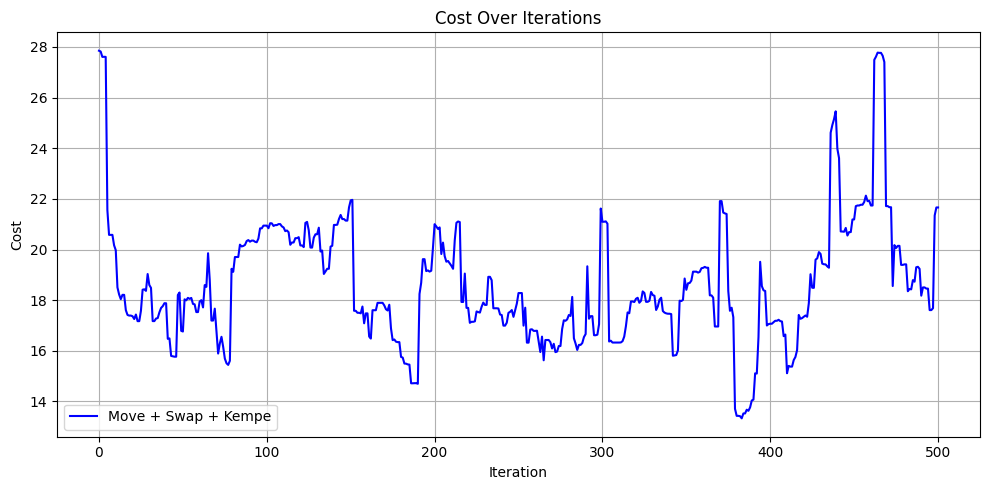

In [ ]:
max_timeslots = 20
num_iterations = 500

# Deepcopy initial timetable and ensure all timeslots exist
initial_timetable = copy.deepcopy(timetableSD)
initial_timetable = initialize_timetable(initial_timetable, max_timeslots)

# --- Run experiments with different method combinations ---

cost_move = run_iterations(initial_timetable, conflict_matrix, max_timeslots, num_iterations,
                           move=True, swap=True, kempe=True, ejection=False)

# Plotting the cost over iterations
plt.figure(figsize=(10, 5))
plt.plot(cost_move, label='Move + Swap + Kempe', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Over Iterations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


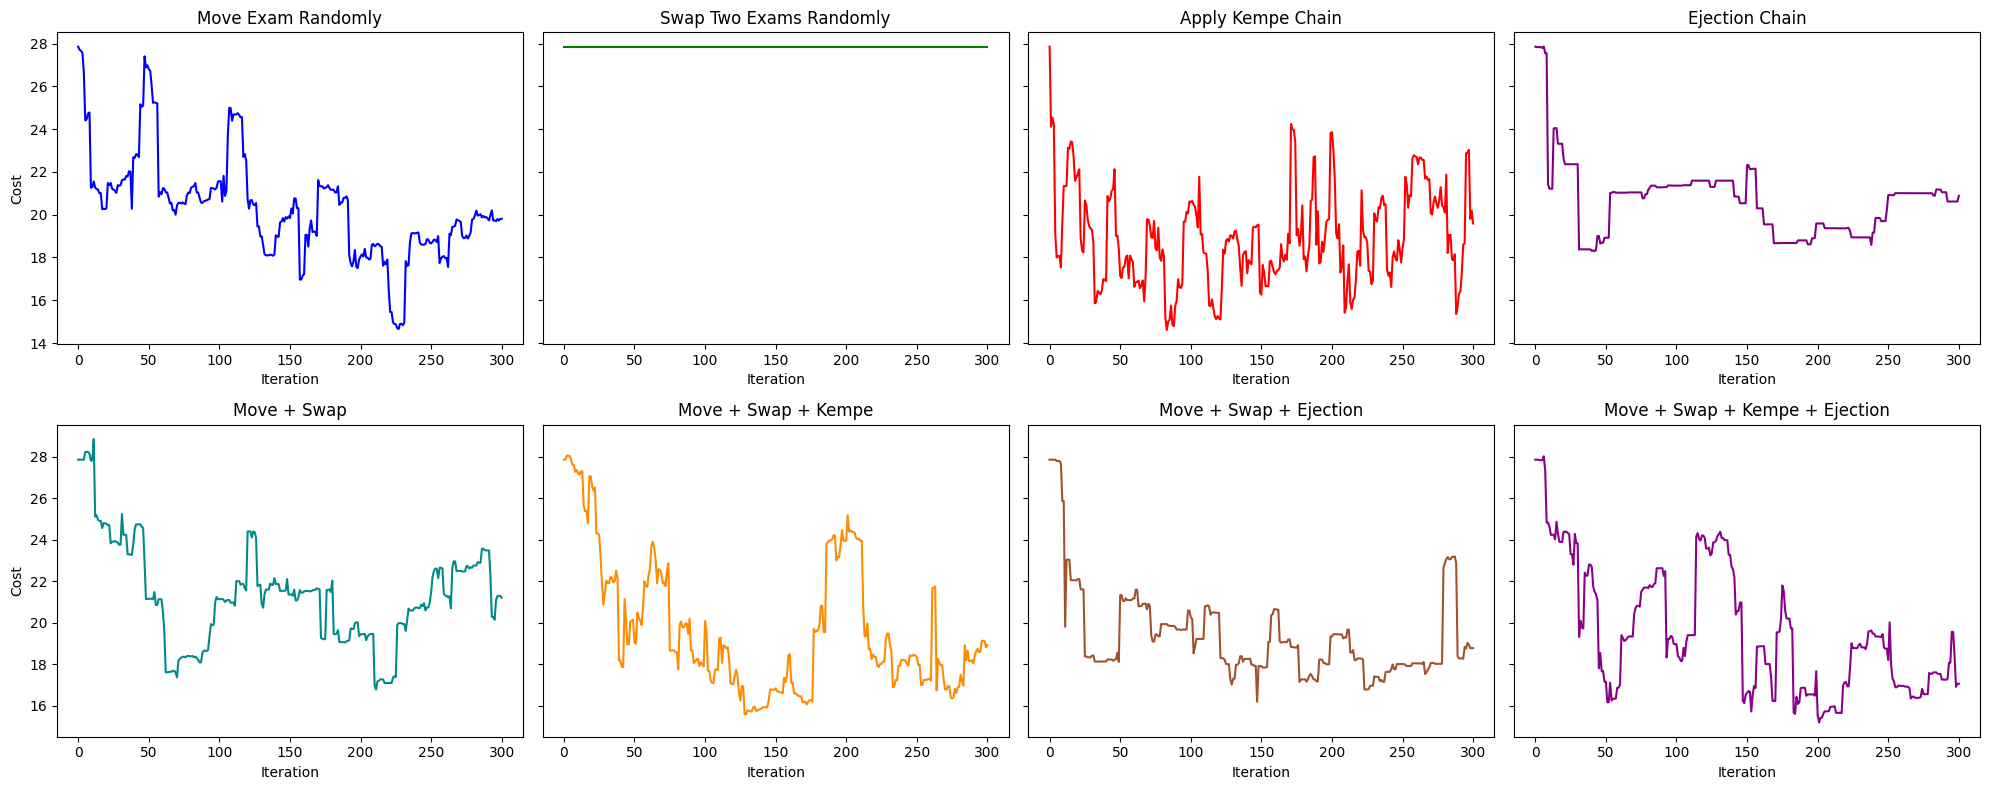

In [ ]:
# --- Setup ---

max_timeslots = 20
num_iterations = 300

# Deepcopy initial timetable and ensure all timeslots exist
initial_timetable = copy.deepcopy(timetableSD)
initial_timetable = initialize_timetable(initial_timetable, max_timeslots)

# --- Run experiments with different method combinations ---

cost_move = run_iterations(initial_timetable, conflict_matrix, max_timeslots, num_iterations,
                           move=True, swap=False, kempe=False, ejection=False)

cost_swap = run_iterations(initial_timetable, conflict_matrix, max_timeslots, num_iterations,
                           move=False, swap=True, kempe=False, ejection=False)

cost_kempe = run_iterations(initial_timetable, conflict_matrix, max_timeslots, num_iterations,
                            move=False, swap=False, kempe=True, ejection=False)

cost_ejection = run_iterations(initial_timetable, conflict_matrix, max_timeslots, num_iterations,
                               move=False, swap=False, kempe=False, ejection=True)

cost_move_swap = run_iterations(initial_timetable, conflict_matrix, max_timeslots, num_iterations,
                                move=True, swap=True, kempe=False, ejection=False)

cost_move_swap_kempe = run_iterations(initial_timetable, conflict_matrix, max_timeslots, num_iterations,
                                      move=True, swap=True, kempe=True, ejection=False)

cost_move_swap_ejection = run_iterations(initial_timetable, conflict_matrix, max_timeslots, num_iterations,
                                         move=True, swap=True, kempe=False, ejection=True)

cost_all = run_iterations(initial_timetable, conflict_matrix, max_timeslots, num_iterations,
                          move=True, swap=True, kempe=True, ejection=True)

# --- Plotting ---

fig, axs = plt.subplots(2, 4, figsize=(20, 8), sharey='row')

# Top row: Single methods
axs[0, 0].plot(cost_move, color='blue')
axs[0, 0].set_title("Move Exam Randomly")
axs[0, 0].set_xlabel("Iteration")
axs[0, 0].set_ylabel("Cost")

axs[0, 1].plot(cost_swap, color='green')
axs[0, 1].set_title("Swap Two Exams Randomly")
axs[0, 1].set_xlabel("Iteration")

axs[0, 2].plot(cost_kempe, color='red')
axs[0, 2].set_title("Apply Kempe Chain")
axs[0, 2].set_xlabel("Iteration")

axs[0, 3].plot(cost_ejection, color='purple')
axs[0, 3].set_title("Ejection Chain")
axs[0, 3].set_xlabel("Iteration")

# Bottom row: Combined methods with darker colors
axs[1, 0].plot(cost_move_swap, color='#008b8b')  # dark cyan
axs[1, 0].set_title("Move + Swap")
axs[1, 0].set_xlabel("Iteration")
axs[1, 0].set_ylabel("Cost")

axs[1, 1].plot(cost_move_swap_kempe, color='#ff8c00')  # dark orange
axs[1, 1].set_title("Move + Swap + Kempe")
axs[1, 1].set_xlabel("Iteration")

axs[1, 2].plot(cost_move_swap_ejection, color='#a0522d')  # dark magenta
axs[1, 2].set_title("Move + Swap + Ejection")
axs[1, 2].set_xlabel("Iteration")

axs[1, 3].plot(cost_all, color='#8b008b')  # sienna brown
axs[1, 3].set_title("Move + Swap + Kempe + Ejection")
axs[1, 3].set_xlabel("Iteration")


plt.tight_layout()
plt.show()


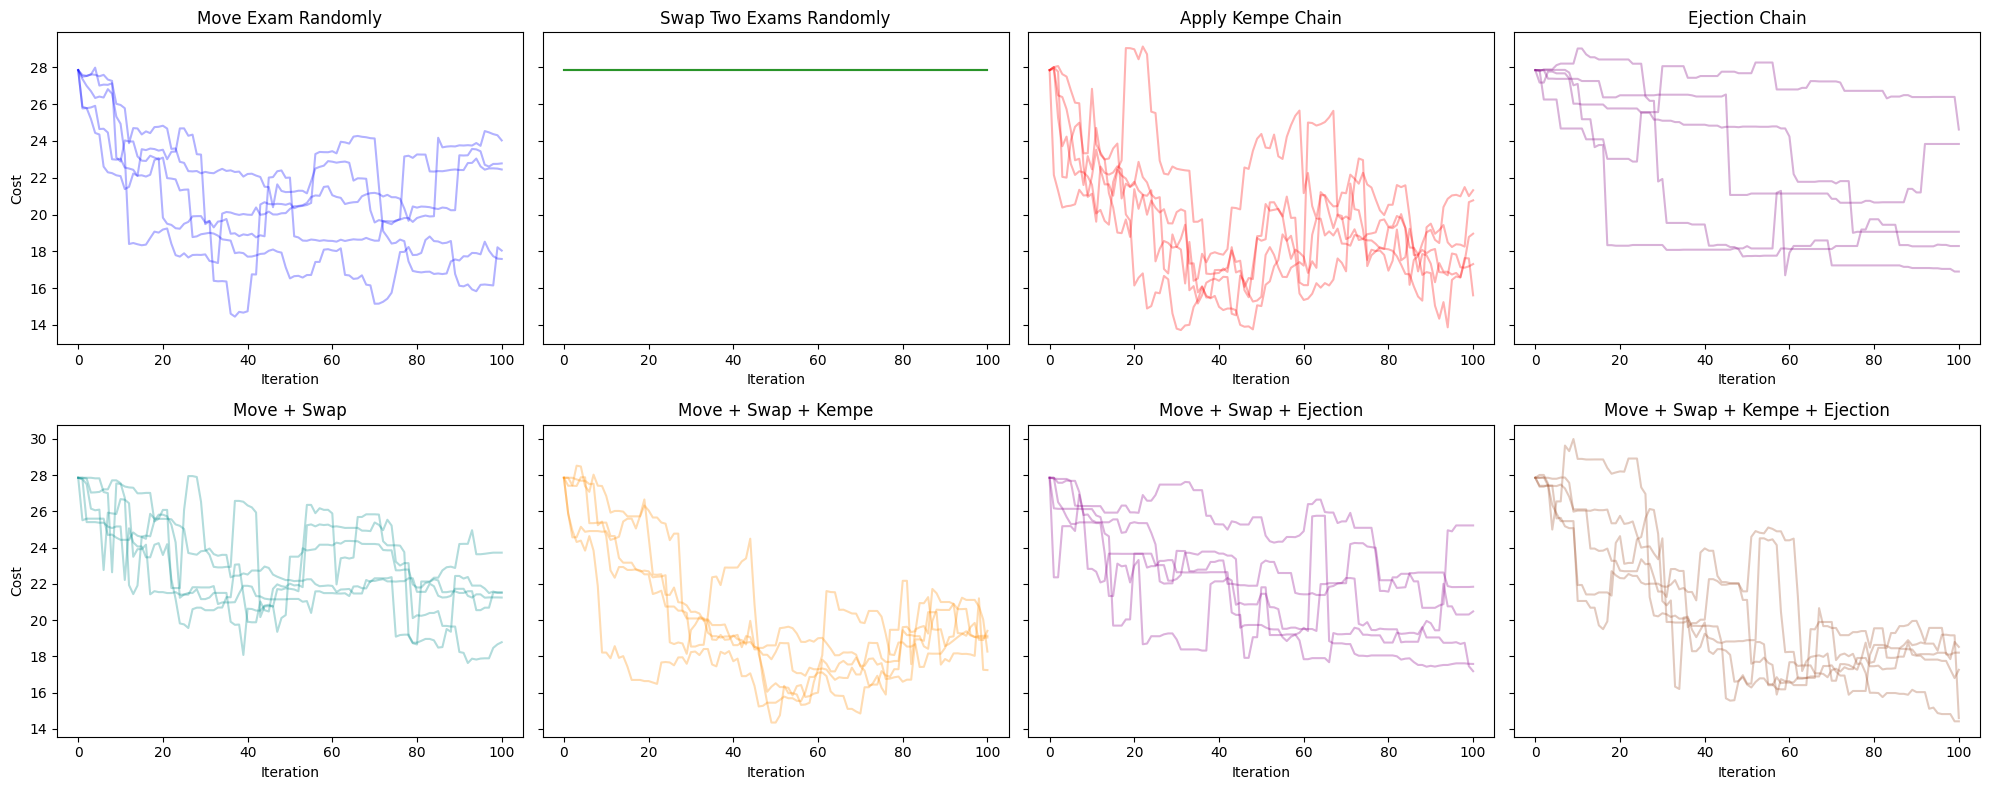

In [ ]:

# --- Setup ---

max_timeslots = 20
num_iterations = 100
num_repeats = 5  # number of runs per method



# Deepcopy initial timetable and ensure all timeslots exist
initial_timetable = copy.deepcopy(timetableSD)
initial_timetable = initialize_timetable(initial_timetable, max_timeslots)

methods = [
    ("Move Exam Randomly", {'move': True, 'swap': False, 'kempe': False, 'ejection': False}, 'blue'),
    ("Swap Two Exams Randomly", {'move': False, 'swap': True, 'kempe': False, 'ejection': False}, 'green'),
    ("Apply Kempe Chain", {'move': False, 'swap': False, 'kempe': True, 'ejection': False}, 'red'),
    ("Ejection Chain", {'move': False, 'swap': False, 'kempe': False, 'ejection': True}, 'purple'),
    ("Move + Swap", {'move': True, 'swap': True, 'kempe': False, 'ejection': False}, '#008b8b'),  # dark cyan
    ("Move + Swap + Kempe", {'move': True, 'swap': True, 'kempe': True, 'ejection': False}, '#ff8c00'),  # dark orange
    ("Move + Swap + Ejection", {'move': True, 'swap': True, 'kempe': False, 'ejection': True}, '#8b008b'),  # dark magenta
    ("Move + Swap + Kempe + Ejection", {'move': True, 'swap': True, 'kempe': True, 'ejection': True}, '#a0522d'),  # sienna brown
]

fig, axs = plt.subplots(2, 4, figsize=(20, 8), sharey='row')

for idx, (title, params, color) in enumerate(methods):
    ax = axs[idx // 4, idx % 4]

    for run in range(num_repeats):
        # Deepcopy initial timetable fresh for each run
        initial_tt_run = copy.deepcopy(initial_timetable)
        costs = run_iterations(initial_tt_run, conflict_matrix, max_timeslots, num_iterations, **params)
        ax.plot(costs, color=color, alpha=0.3)  # alpha for transparency

    ax.set_title(title)
    ax.set_xlabel("Iteration")
    if idx % 4 == 0:
        ax.set_ylabel("Cost")

plt.tight_layout()
plt.show()


## show best and all cost

In [ ]:
def run_iterations2(timetable, conflict_matrix, max_timeslots, num_iterations,
                   move=True, swap=True, kempe=False, ejection=False,
                   max_chain_length=10):
    """
    Execute `num_iterations` random neighbourhood moves.
    Returns
    -------
    all_costs  : list[float] – cost after each iteration (len = num_iterations+1)
    best_costs : list[float] – running min up to each iteration (same length)
    """
    current_tt  = copy.deepcopy(timetable)
    all_costs   = []
    best_costs  = []

    # cost at iteration 0 (before any move)
    best_cost = calculate_proximity_cost(current_tt, conflict_matrix)
    all_costs.append(best_cost)
    best_costs.append(best_cost)

    # assemble allowed move names once
    menu = []
    if move:     menu.append("move")
    if swap:     menu.append("swap")
    if kempe:    menu.append("kempe")
    if ejection: menu.append("ejection")

    for _ in range(num_iterations):
        op = random.choice(menu)

        now_tt = copy.deepcopy(current_tt)

        if op == "move":
            current_tt = move_exam_randomly(current_tt, max_timeslots, conflict_matrix)

        elif op == "swap":
            current_tt = swap_two_exams_randomly(current_tt, conflict_matrix)

        elif op == "kempe":
            current_tt, _ = apply_kempe_chain(current_tt, conflict_matrix, max_timeslots)

        elif op == "ejection":
            current_tt, _ = ejection_chain(current_tt, conflict_matrix,max_chain_length)

        cur_cost  = calculate_proximity_cost(current_tt, conflict_matrix)

        now_cost  = calculate_proximity_cost(now_tt, conflict_matrix)


        #if cur_cost > now_cost:
         #   current_tt = copy.deepcopy(now_tt)




        best_cost = min(best_cost, cur_cost)

        all_costs.append(cur_cost)
        best_costs.append(best_cost)

    return all_costs, best_costs


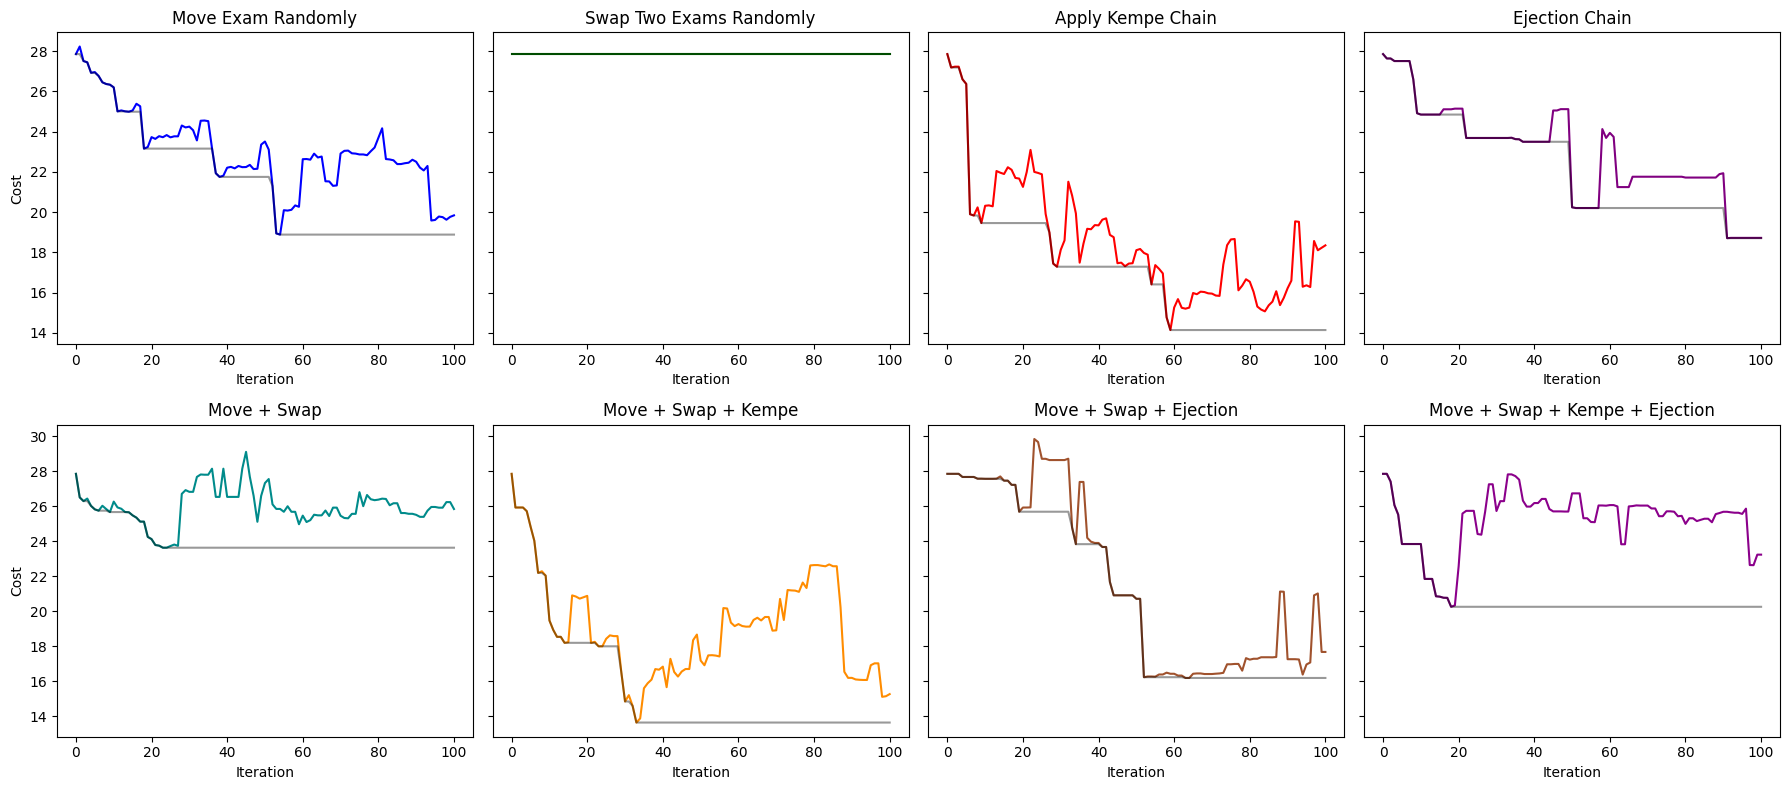

In [ ]:
  # --------------------------------------------------------------------
#  SET-UP
# --------------------------------------------------------------------
max_timeslots  = 20
num_iterations = 100


initial_tt = initialize_timetable(copy.deepcopy(timetableSD), max_timeslots)

# --------------------------------------------------------------------
#  RUN all 8 neighbourhood settings
# --------------------------------------------------------------------
cost_move                = run_iterations2(initial_tt, conflict_matrix, max_timeslots, num_iterations,
                                          move=True , swap=False, kempe=False, ejection=False)

cost_swap                = run_iterations2(initial_tt, conflict_matrix, max_timeslots, num_iterations,
                                          move=False, swap=True , kempe=False, ejection=False)

cost_kempe               = run_iterations2(initial_tt, conflict_matrix, max_timeslots, num_iterations,
                                          move=False, swap=False, kempe=True , ejection=False)

cost_ejection            = run_iterations2(initial_tt, conflict_matrix, max_timeslots, num_iterations,
                                          move=False, swap=False, kempe=False, ejection=True )

cost_move_swap           = run_iterations2(initial_tt, conflict_matrix, max_timeslots, num_iterations,
                                          move=True , swap=True , kempe=False, ejection=False)

cost_move_swap_kempe     = run_iterations2(initial_tt, conflict_matrix, max_timeslots, num_iterations,
                                          move=True , swap=True , kempe=True , ejection=False)

cost_move_swap_ejection  = run_iterations2(initial_tt, conflict_matrix, max_timeslots, num_iterations,
                                          move=True , swap=True , kempe=False, ejection=True )

cost_all                 = run_iterations2(initial_tt, conflict_matrix, max_timeslots, num_iterations,
                                          move=True , swap=True , kempe=True , ejection=True )

# --------------------------------------------------------------------
#  PLOT
# --------------------------------------------------------------------
fig, axs = plt.subplots(2, 4, figsize=(20, 8), sharey='row')

def plot_pair(ax, all_costs, best_costs, title, color):
    """Plot current (solid) and best-so-far (dotted) curves."""
    ax.plot(all_costs, color=color, label='current')
    ax.plot(best_costs, color='black',  label='best', alpha=0.4)
    ax.set_title(title)
    ax.set_xlabel("Iteration")

# top-row single moves
plot_pair(axs[0,0], *cost_move,    "Move Exam Randomly", 'blue');     axs[0,0].set_ylabel("Cost")
plot_pair(axs[0,1], *cost_swap,    "Swap Two Exams Randomly", 'green')
plot_pair(axs[0,2], *cost_kempe,   "Apply Kempe Chain", 'red')
plot_pair(axs[0,3], *cost_ejection,"Ejection Chain", 'purple')

# bottom-row combined
plot_pair(axs[1,0], *cost_move_swap,          "Move + Swap", '#008b8b'); axs[1,0].set_ylabel("Cost")
plot_pair(axs[1,1], *cost_move_swap_kempe,    "Move + Swap + Kempe", '#ff8c00')
plot_pair(axs[1,2], *cost_move_swap_ejection, "Move + Swap + Ejection", '#a0522d')
plot_pair(axs[1,3], *cost_all,               "Move + Swap + Kempe + Ejection", '#8b008b')

# single legend for one exemplar; adjust as you like
handles, labels = axs[0,0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.01, 0.9))

plt.tight_layout(rect=[0,0,0.9,1])
plt.show()
